# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; and
5. Create meaningful visualizations to analyze the data!
---

## Important Dates

- Homework release: Fri 2 Oct 2020
- **Homework due**: Fri 16 Oct 2020, 23:59
- Grade release: Fri 23 Oct 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the `data` folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in either comments or markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.



## Context

The coronavirus pandemic has led to the implementation of unprecedented non-pharmaceutical interventions ranging from case isolation to national lockdowns. These interventions, along with the disease itself, have created massive shifts in people’s lives. For instance, in mid-May 2020, more than one third of the global population was under lockdown, and millions have since lost their jobs or have moved to work-from-home arrangements.


Importantly, the disease has shifted people's [needs](https://en.wikipedia.org/wiki/Toilet_paper), [interests](https://en.wikipedia.org/wiki/TikTok), and [concerns](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Switzerland) across the globe.

In this homework, we will take a deep dive into Wikipedia data and try to uncover what changed with the pandemic. More specifically, we will be focusing on Wikipedia pageviews, that is, how many people read each article on Wikipedia each day.
A nice graphical user interface for playing with Wikipedia pageviews is available [here](https://pageviews.toolforge.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&range=latest-20&pages=Cat|Dog).
Also, the Wikimedia Foundation releases dump files with the number of pageviews per article across all Wikimedia websites, including Wikipedia in all its language editions [(amazing, right?)](https://dumps.wikimedia.org/other/pagecounts-ez/). 

#### But wait, what is a pageview?

> A pageview or page view, abbreviated in business to PV and occasionally called page impression, is a request to load a single HTML file (web page) of an Internet site. On the World Wide Web, a page request would result from a web surfer clicking on a link on another page pointing to the page in question. (Source: [Wikipedia article "Pageviews"](https://en.wikipedia.org/wiki/Pageview))

Pageviews in Wikipedia can tell us that people are looking for certain information online. Analyzing how the volume and the distribution of pageviews changed can tell us about how the behavior of Wikipedia readers has changed.

In this homework, you will take a deep dive into analyzing Wikipedia pageview logs and uncover shifts in interests associated with the current pandemic.

---

## The data

First, you need to download a **meraviglioso** dataset from the Italian Wikipedia that we prepared for you. The structure of the data is described next. 

**The dataset is available in the `data` directory pushed to the same GitHub repo as the homework**. Inside of the data directory, you will find three files:

### `articles.tsv.gz`

This is a tab-separated file containing daily pageviews for a subset of the articles from Italian Wikipedia. It is compressed! Each row corresponds to a different article, and each column (except the first) corresponds to the number of pageviews this article received on a given day. The example below shows the structure for two of the things [Kristina Gligorić](https://kristinagligoric.github.io/), one of your TAs, likes the most on her Pizza:

**Example:**
~~~
index       2018-01-01 00:00:00    2018-01-02 00:00:00 (...)
Formaggio   100                    101                 (...)
Ananas      12                     54                  (...)
(...)       (...)                  (...)
~~~


### `topics.jsonl.gz`

This is a classification of which topics an article belongs to, according to a model released by the Wikimedia Foundation (the classes are derived from this [taxonomy](https://www.mediawiki.org/wiki/ORES/Articletopic)). Importantly, this file was obtained from English Wikipedia, while the previous one contains articles from the Italian Wikipedia. This is important because article titles in the Italian Wikipedia are in Italian, while article titles in the English page are in English (duh!). In any case, each line contains a .json object with
the English name of the article (name);
1. the English name of the article (`name`);
2. a set of fields related to topics themselves. Each of these fields is set as either `True` (if the article belongs to this topic) or `False` (if it does not). Notice that the same article may belong to multiple topics. 

**Example:**
~~~
{"index": "Cheese", "Culture.Food and drink": True, "Culture.Literature": False (...)}
{"index": "Pineapple", "Culture.Food and drink": True, "Culture.Literature": False (...)}
(...)
~~~

 
### `mapping.pickle`

This is a `.pickle` file, that is, a serialized Python object. You can read about Python pickles  [here](https://wiki.python.org/moin/UsingPickle), 
but in short: the default Python library `pickle` allows you to save and load Python objects to and from disk. This is one object saved via the pickle library: a Python dictionary containing a mapping between the English names and the Italian names of Wikipedia articles:

**Example:**
~~~
{
    "Cheese": "Formaggio",
    "Ananas": "Pineapple"
    (...)
}
~~~
---


## _Step 1:_ Loading the data

---
### **Task 1**

Your first task is to load all these datasets into memory using pandas and pickle. 
**You should load the files compressed.**

Here, the files at hand are rather small, and you could easily uncompress  the files to disk and work with them as plain text. 
Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, this will often not be the case.

Then, working with compressed files is key so that you don't receive e-mail from your (often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your datasets. 
Another big advantage of compressing files is to simply read files faster. You will often find that reading compressed data on the fly (uncompressing it as you go), is much faster than reading compressed data, since reading and writing to the disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

 
---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). Check the `error_bad_lines` parameter on `read_csv`.

In [2]:
import pickle
import gzip
import json
import csv
import re
import pandas as pd
### ~ 1.1
### Your code here! ###
# mapping = pickle.load(open( "data/mapping.pickle", "rb" ) )
mapping = pd.read_pickle( "data/mapping.pickle" )
mapping

{'Chinese_food_therapy': 'Dietetica_cinese',
 'Battle_of_Naissus': 'Battaglia_di_Naisso',
 'Battle_of_Stoke_Field': 'Battaglia_di_Stoke_Field',
 'Smooth_newt': 'Lissotriton_vulgaris',
 'Vicente_Aleixandre': 'Vicente_Aleixandre',
 'Piast_dynasty': 'Piast',
 'Antenor': 'Antenore_(scultore)',
 'Cranford,_New_Jersey': 'Cranford_(New_Jersey)',
 'New_Castle,_Indiana': 'New_Castle_(Indiana)',
 'Bugsy': 'Bugsy',
 'Period_6_element': 'Elementi_del_periodo_6',
 'Kite_aerial_photography': "Foto_aerea_con_l'aquilone",
 'World_Economic_Forum': 'Forum_economico_mondiale',
 'Gherman_Titov': 'German_Stepanovič_Titov',
 'Vicarius_Filii_Dei': 'Vicarius_Filii_Dei',
 'SMS_Zrínyi': 'SMS_Zrinyi',
 "Spearman's_rank_correlation_coefficient": 'Coefficiente_di_correlazione_per_ranghi_di_Spearman',
 'Swedish_nobility': 'Nobiltà_svedese',
 'Derrick_Green': 'Derrick_Green',
 'A._Merritt': 'Abraham_Merritt',
 'Lee_Chang-dong': 'Lee_Chang-dong',
 'Shimabara,_Nagasaki': 'Shimabara',
 'George_Mundelein': 'George_Willi

In [3]:
len(mapping)

35611

In [4]:
mapping["Aleksandr_Nedovyesov"]

'Oleksandr_Nedovjesov'

In [5]:
articles = pd.read_csv('data/articles.tsv.gz', compression='gzip', header=0, sep='\t', quotechar='"', error_bad_lines=False)

b'Skipping line 7: expected 944 fields, saw 945\n'


In [6]:
articles.head()

index  2018-01-01 00:00:00  2018-01-02 00:00:00  \
0                        Khulna                    0                    2   
1              Karim_Ansarifard                    1                    5   
2                        Poldhu                    0                    0   
3  Alice_(The_Sisters_of_Mercy)                    0                    1   
4                       Palmyra                    1                    4   

   2018-01-03 00:00:00  2018-01-04 00:00:00  2018-01-05 00:00:00  \
0                    1                    0                    0   
1                    1                    1                    1   
2                    1                    1                    0   
3                    0                    0                    1   
4                    0                    0                    0   

   2018-01-06 00:00:00  2018-01-07 00:00:00  2018-01-08 00:00:00  \
0                    2                    0                    2   
1                    3                    6                    4   
2                    1                    0                    2   
3                    1                    1                    1   
4                    2                   11                    2   

   2018-01-09 00:00:00  ...  2020-07-22 00:00:00  2020-07-23 00:00:00  \
0                    0  ...                    0                    1   
1                    5  ...                    2                    2   
2                    2  ...                    0                    2   
3                    0  ...                    0                    0   
4                    0  ...                    0                    0   

   2020-07-24 00:00:00  2020-07-25 00:00:00  2020-07-26 00:00:00  \
0                    1                    0                    1   
1                    0                    1                    2   
2                    2                    0                    0   
3                    0                    0                    0   
4                    1                    0                    0   

   2020-07-27 00:00:00  2020-07-28 00:00:00  2020-07-29 00:00:00  \
0                    1                    0                    2   
1                    0                    1                    0   
2                    0                    2                    1   
3                    1                    0                    0   
4                    0                    1                    0   

   2020-07-30 00:00:00  2020-07-31 00:00:00  
0                    1                    2  
1                    0                    0  
2                    2                    1  
3                    0                    0  
4                    0                    0  

[5 rows x 944 columns]

In [7]:
articles.shape

(56791, 944)

In [8]:
articles.loc[articles.index=='Oleksandr_Nedovjesov']

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexes/base.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self._values, np.asarray(other))


Empty DataFrame
Columns: [index, 2018-01-01 00:00:00, 2018-01-02 00:00:00, 2018-01-03 00:00:00, 2018-01-04 00:00:00, 2018-01-05 00:00:00, 2018-01-06 00:00:00, 2018-01-07 00:00:00, 2018-01-08 00:00:00, 2018-01-09 00:00:00, 2018-01-10 00:00:00, 2018-01-11 00:00:00, 2018-01-12 00:00:00, 2018-01-13 00:00:00, 2018-01-14 00:00:00, 2018-01-15 00:00:00, 2018-01-16 00:00:00, 2018-01-17 00:00:00, 2018-01-18 00:00:00, 2018-01-19 00:00:00, 2018-01-20 00:00:00, 2018-01-21 00:00:00, 2018-01-22 00:00:00, 2018-01-23 00:00:00, 2018-01-24 00:00:00, 2018-01-25 00:00:00, 2018-01-26 00:00:00, 2018-01-27 00:00:00, 2018-01-28 00:00:00, 2018-01-29 00:00:00, 2018-01-30 00:00:00, 2018-01-31 00:00:00, 2018-02-01 00:00:00, 2018-02-02 00:00:00, 2018-02-03 00:00:00, 2018-02-04 00:00:00, 2018-02-05 00:00:00, 2018-02-06 00:00:00, 2018-02-07 00:00:00, 2018-02-08 00:00:00, 2018-02-09 00:00:00, 2018-02-10 00:00:00, 2018-02-11 00:00:00, 2018-02-12 00:00:00, 2018-02-13 00:00:00, 2018-02-14 00:00:00, 2018-02-15 00:00:00, 2018-02-16 00:00:00, 2018-02-17 00:00:00, 2018-02-18 00:00:00, 2018-02-19 00:00:00, 2018-02-20 00:00:00, 2018-02-21 00:00:00, 2018-02-22 00:00:00, 2018-02-23 00:00:00, 2018-02-24 00:00:00, 2018-02-25 00:00:00, 2018-02-26 00:00:00, 2018-02-27 00:00:00, 2018-02-28 00:00:00, 2018-03-01 00:00:00, 2018-03-02 00:00:00, 2018-03-03 00:00:00, 2018-03-04 00:00:00, 2018-03-05 00:00:00, 2018-03-06 00:00:00, 2018-03-07 00:00:00, 2018-03-08 00:00:00, 2018-03-09 00:00:00, 2018-03-10 00:00:00, 2018-03-11 00:00:00, 2018-03-12 00:00:00, 2018-03-13 00:00:00, 2018-03-14 00:00:00, 2018-03-15 00:00:00, 2018-03-16 00:00:00, 2018-03-17 00:00:00, 2018-03-18 00:00:00, 2018-03-19 00:00:00, 2018-03-20 00:00:00, 2018-03-21 00:00:00, 2018-03-22 00:00:00, 2018-03-23 00:00:00, 2018-03-24 00:00:00, 2018-03-25 00:00:00, 2018-03-26 00:00:00, 2018-03-27 00:00:00, 2018-03-28 00:00:00, 2018-03-29 00:00:00, 2018-03-30 00:00:00, 2018-03-31 00:00:00, 2018-04-01 00:00:00, 2018-04-02 00:00:00, 2018-04-03 00:00:00, 2018-04-04 00:00:00, 2018-04-05 00:00:00, 2018-04-06 00:00:00, 2018-04-07 00:00:00, 2018-04-08 00:00:00, 2018-04-09 00:00:00, ...]
Index: []

[0 rows x 944 columns]

In [9]:
with gzip.open('data/topics.jsonl.gz', 'rb') as f:
    data = [json.loads(line) for line in f]
topics_data = pd.DataFrame(data)
topics_data

index  \
0                    Chinese_food_therapy   
1                       Battle_of_Naissus   
2                   Battle_of_Stoke_Field   
3                             Smooth_newt   
4                      Vicente_Aleixandre   
...                                   ...   
35606                         Banca_Akros   
35607                     Arms_Around_You   
35608                   Gioventù_bruciata   
35609  Power_Rangers:_Battle_for_the_Grid   
35610        6th_Pioneer_Regiment_(Italy)   

       Geography.Regions.Asia.Central Asia  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   
...                                    ...   
35606                                False   
35607                                False   
35608                                False   
35609                                False   
35610                                False   

       Geography.Regions.Europe.Eastern Europe  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   
...                                        ...   
35606                                    False   
35607                                    False   
35608                                    False   
35609                                    False   
35610                                    False   

       History and Society.Military and warfare  Culture.Media.Television  \
0                                         False                     False   
1                                          True                     False   
2                                          True                     False   
3                                         False                     False   
4                                         False                     False   
...                                         ...                       ...   
35606                                     False                     False   
35607                                     False                     False   
35608                                     False                     False   
35609                                     False                     False   
35610                                      True                     False   

       History and Society.Education  Culture.Media.Books  \
0                              False                False   
1                              False                False   
2                              False                False   
3                              False                False   
4                              False                False   
...                              ...                  ...   
35606                          False                False   
35607                          False                False   
35608                          False                False   
35609                          False                False   
35610                          False                False   

       Geography.Regions.Africa.Africa*  Culture.Visual arts.Architecture  \
0                                 False                             False   
1                                 False                             False   
2                                 False                             False   
3                                 False                             False   
4                                 False                             False   
...                                 ...                               ...   
35606                             False                             False   
35607                             False                            

## _Step 2:_ Filtering the data

---
### **Task 2**

Oh no! Something seems wrong with your dataframe!
It seems that some of the lines in the `articles.tsv.gz` are weird! 
They have titles in the format `"Discussione:name_of_the_page"`.

Unsure of what they mean, you ask about them in the [Wiki-research mailing list](https://lists.wikimedia.org/mailman/listinfo/wiki-research-l).
Twenty minutes later a kind internet stranger comes with an answer! 
She tells you that these are talk pages, where people discussing what should and should not be in the article (in fact it can be pretty funny to read, eg, [you can read Italians debating about pizza](https://it.wikipedia.org/wiki/Discussione:Pizza))

After understanding what they are, your task is now to filter these lines using `pandas`! After all, we are interested in pageviews going towards articles! Not discussion pages!

---

**Hint**: There is one of them in the position \#180 of the dataframe, if you want to check it!

In [10]:
### ~ 2.1
### Your code here! ###
articles[articles.index==180]

index  2018-01-01 00:00:00  2018-01-02 00:00:00  \
180  Discussione:Jitter                   21                   41   

     2018-01-03 00:00:00  2018-01-04 00:00:00  2018-01-05 00:00:00  \
180                   42                   55                   51   

     2018-01-06 00:00:00  2018-01-07 00:00:00  2018-01-08 00:00:00  \
180                   31                   31                   39   

     2018-01-09 00:00:00  ...  2020-07-22 00:00:00  2020-07-23 00:00:00  \
180                   60  ...                   32                   34   

     2020-07-24 00:00:00  2020-07-25 00:00:00  2020-07-26 00:00:00  \
180                   28                   17                   13   

     2020-07-27 00:00:00  2020-07-28 00:00:00  2020-07-29 00:00:00  \
180                   34                   33                   16   

     2020-07-30 00:00:00  2020-07-31 00:00:00  
180                   21                   21  

[1 rows x 944 columns]

In [11]:
articles=articles[ ~ articles['index'].str.contains('Discussione:')]

In [12]:
articles[articles.index==180]

Empty DataFrame
Columns: [index, 2018-01-01 00:00:00, 2018-01-02 00:00:00, 2018-01-03 00:00:00, 2018-01-04 00:00:00, 2018-01-05 00:00:00, 2018-01-06 00:00:00, 2018-01-07 00:00:00, 2018-01-08 00:00:00, 2018-01-09 00:00:00, 2018-01-10 00:00:00, 2018-01-11 00:00:00, 2018-01-12 00:00:00, 2018-01-13 00:00:00, 2018-01-14 00:00:00, 2018-01-15 00:00:00, 2018-01-16 00:00:00, 2018-01-17 00:00:00, 2018-01-18 00:00:00, 2018-01-19 00:00:00, 2018-01-20 00:00:00, 2018-01-21 00:00:00, 2018-01-22 00:00:00, 2018-01-23 00:00:00, 2018-01-24 00:00:00, 2018-01-25 00:00:00, 2018-01-26 00:00:00, 2018-01-27 00:00:00, 2018-01-28 00:00:00, 2018-01-29 00:00:00, 2018-01-30 00:00:00, 2018-01-31 00:00:00, 2018-02-01 00:00:00, 2018-02-02 00:00:00, 2018-02-03 00:00:00, 2018-02-04 00:00:00, 2018-02-05 00:00:00, 2018-02-06 00:00:00, 2018-02-07 00:00:00, 2018-02-08 00:00:00, 2018-02-09 00:00:00, 2018-02-10 00:00:00, 2018-02-11 00:00:00, 2018-02-12 00:00:00, 2018-02-13 00:00:00, 2018-02-14 00:00:00, 2018-02-15 00:00:00, 2018-02-16 00:00:00, 2018-02-17 00:00:00, 2018-02-18 00:00:00, 2018-02-19 00:00:00, 2018-02-20 00:00:00, 2018-02-21 00:00:00, 2018-02-22 00:00:00, 2018-02-23 00:00:00, 2018-02-24 00:00:00, 2018-02-25 00:00:00, 2018-02-26 00:00:00, 2018-02-27 00:00:00, 2018-02-28 00:00:00, 2018-03-01 00:00:00, 2018-03-02 00:00:00, 2018-03-03 00:00:00, 2018-03-04 00:00:00, 2018-03-05 00:00:00, 2018-03-06 00:00:00, 2018-03-07 00:00:00, 2018-03-08 00:00:00, 2018-03-09 00:00:00, 2018-03-10 00:00:00, 2018-03-11 00:00:00, 2018-03-12 00:00:00, 2018-03-13 00:00:00, 2018-03-14 00:00:00, 2018-03-15 00:00:00, 2018-03-16 00:00:00, 2018-03-17 00:00:00, 2018-03-18 00:00:00, 2018-03-19 00:00:00, 2018-03-20 00:00:00, 2018-03-21 00:00:00, 2018-03-22 00:00:00, 2018-03-23 00:00:00, 2018-03-24 00:00:00, 2018-03-25 00:00:00, 2018-03-26 00:00:00, 2018-03-27 00:00:00, 2018-03-28 00:00:00, 2018-03-29 00:00:00, 2018-03-30 00:00:00, 2018-03-31 00:00:00, 2018-04-01 00:00:00, 2018-04-02 00:00:00, 2018-04-03 00:00:00, 2018-04-04 00:00:00, 2018-04-05 00:00:00, 2018-04-06 00:00:00, 2018-04-07 00:00:00, 2018-04-08 00:00:00, 2018-04-09 00:00:00, ...]
Index: []

[0 rows x 944 columns]

In [13]:
articles = articles.dropna(subset=["index"])

In [14]:
articles.shape

(55791, 944)

In [15]:
articles[articles.index==180]

Empty DataFrame
Columns: [index, 2018-01-01 00:00:00, 2018-01-02 00:00:00, 2018-01-03 00:00:00, 2018-01-04 00:00:00, 2018-01-05 00:00:00, 2018-01-06 00:00:00, 2018-01-07 00:00:00, 2018-01-08 00:00:00, 2018-01-09 00:00:00, 2018-01-10 00:00:00, 2018-01-11 00:00:00, 2018-01-12 00:00:00, 2018-01-13 00:00:00, 2018-01-14 00:00:00, 2018-01-15 00:00:00, 2018-01-16 00:00:00, 2018-01-17 00:00:00, 2018-01-18 00:00:00, 2018-01-19 00:00:00, 2018-01-20 00:00:00, 2018-01-21 00:00:00, 2018-01-22 00:00:00, 2018-01-23 00:00:00, 2018-01-24 00:00:00, 2018-01-25 00:00:00, 2018-01-26 00:00:00, 2018-01-27 00:00:00, 2018-01-28 00:00:00, 2018-01-29 00:00:00, 2018-01-30 00:00:00, 2018-01-31 00:00:00, 2018-02-01 00:00:00, 2018-02-02 00:00:00, 2018-02-03 00:00:00, 2018-02-04 00:00:00, 2018-02-05 00:00:00, 2018-02-06 00:00:00, 2018-02-07 00:00:00, 2018-02-08 00:00:00, 2018-02-09 00:00:00, 2018-02-10 00:00:00, 2018-02-11 00:00:00, 2018-02-12 00:00:00, 2018-02-13 00:00:00, 2018-02-14 00:00:00, 2018-02-15 00:00:00, 2018-02-16 00:00:00, 2018-02-17 00:00:00, 2018-02-18 00:00:00, 2018-02-19 00:00:00, 2018-02-20 00:00:00, 2018-02-21 00:00:00, 2018-02-22 00:00:00, 2018-02-23 00:00:00, 2018-02-24 00:00:00, 2018-02-25 00:00:00, 2018-02-26 00:00:00, 2018-02-27 00:00:00, 2018-02-28 00:00:00, 2018-03-01 00:00:00, 2018-03-02 00:00:00, 2018-03-03 00:00:00, 2018-03-04 00:00:00, 2018-03-05 00:00:00, 2018-03-06 00:00:00, 2018-03-07 00:00:00, 2018-03-08 00:00:00, 2018-03-09 00:00:00, 2018-03-10 00:00:00, 2018-03-11 00:00:00, 2018-03-12 00:00:00, 2018-03-13 00:00:00, 2018-03-14 00:00:00, 2018-03-15 00:00:00, 2018-03-16 00:00:00, 2018-03-17 00:00:00, 2018-03-18 00:00:00, 2018-03-19 00:00:00, 2018-03-20 00:00:00, 2018-03-21 00:00:00, 2018-03-22 00:00:00, 2018-03-23 00:00:00, 2018-03-24 00:00:00, 2018-03-25 00:00:00, 2018-03-26 00:00:00, 2018-03-27 00:00:00, 2018-03-28 00:00:00, 2018-03-29 00:00:00, 2018-03-30 00:00:00, 2018-03-31 00:00:00, 2018-04-01 00:00:00, 2018-04-02 00:00:00, 2018-04-03 00:00:00, 2018-04-04 00:00:00, 2018-04-05 00:00:00, 2018-04-06 00:00:00, 2018-04-07 00:00:00, 2018-04-08 00:00:00, 2018-04-09 00:00:00, ...]
Index: []

[0 rows x 944 columns]

In [16]:
articles=articles.set_index("index")

In [17]:
articles.columns

Index(['2018-01-01 00:00:00', '2018-01-02 00:00:00', '2018-01-03 00:00:00',
       '2018-01-04 00:00:00', '2018-01-05 00:00:00', '2018-01-06 00:00:00',
       '2018-01-07 00:00:00', '2018-01-08 00:00:00', '2018-01-09 00:00:00',
       '2018-01-10 00:00:00',
       ...
       '2020-07-22 00:00:00', '2020-07-23 00:00:00', '2020-07-24 00:00:00',
       '2020-07-25 00:00:00', '2020-07-26 00:00:00', '2020-07-27 00:00:00',
       '2020-07-28 00:00:00', '2020-07-29 00:00:00', '2020-07-30 00:00:00',
       '2020-07-31 00:00:00'],
      dtype='object', length=943)

In [18]:
articles.columns = pd.to_datetime(articles.columns)
articles

2018-01-01  2018-01-02  2018-01-03  2018-01-04  \
index                                                                          
Khulna                                 0           2           1           0   
Karim_Ansarifard                       1           5           1           1   
Poldhu                                 0           0           1           1   
Alice_(The_Sisters_of_Mercy)           0           1           0           0   
Palmyra                                1           4           0           0   
...                                  ...         ...         ...         ...   
Metodologia_della_formazione           1           8           8           9   
Metal_Black                            0           0           0           0   
Tonino_Accolla                        66          98          84          95   
The_United_States_Steel_Hour           0           1           4           0   
Mauro_Manotas                          1           0           0           0   

                              2018-01-05  2018-01-06  2018-01-07  2018-01-08  \
index                                                                          
Khulna                                 0           2           0           2   
Karim_Ansarifard                       1           3           6           4   
Poldhu                                 0           1           0           2   
Alice_(The_Sisters_of_Mercy)           1           1           1           1   
Palmyra                                0           2          11           2   
...                                  ...         ...         ...         ...   
Metodologia_della_formazione           4           4           2           5   
Metal_Black                            1           0           0           0   
Tonino_Accolla                        99          79          59          81   
The_United_States_Steel_Hour           0           0           0           2   
Mauro_Manotas                          1           0           0           0   

                              2018-01-09  2018-01-10  ...  2020-07-22  \
index                                                 ...               
Khulna                                 0           1  ...           0   
Karim_Ansarifard                       5           6  ...           2   
Poldhu                                 2           3  ...           0   
Alice_(The_Sisters_of_Mercy)           0           0  ...           0   
Palmyra                                0           0  ...           0   
...                                  ...         ...  ...         ...   
Metodologia_della_formazione          16          15  ...           9   
Metal_Black                            0           0  ...           0   
Tonino_Accolla                        77          83  ...          43   
The_United_States_Steel_Hour           0           0  ...           1   
Mauro_Manotas                          0           0  ...           0   

                              2020-07-23  2020-07-24  2020-07-25  2020-07-26  \
index                                                                          
Khulna                                 1           1           0           1   
Karim_Ansarifard                       2           0           1           2   
Poldhu                                 2           2           0           0   
Alice_(The_Sisters_of_Mercy)           0           0           0           0   
Palmyra                                0           1           0           0   
...                                  ...         ...         ...         ...   
Metodologia_della_formazione           8           7           7           2   
Metal_Black                            0           0           0           1   
Tonino_Accolla                        40          39          46          33   
The_United_States_Steel_Hour           1           2           0           0   
Mauro_Manotas                         

## *Step 3*: Understanding the data

---
### **Task 3.1**
Data cleaning is hard huh? But now that this headache is behind us we can go on to explore our data.

Let's begin with some basic stats. It is always important to do this as a sanity check.

You should:

1. Start by calculating how many topics and articles there are. Also, while you are at it, print the names of the topics to get a grasp of what they are about. 
2. Calculate the average daily number of pageviews in the dataset.
3. **Discuss:** As previously mentioned, your data is a sample of _some_ (and not all) Wikipedia articles! Estimate (roughly) what percentage of Italian Wikipedia articles are in your dataset comparing your daily average pageview numbers with the official statistics (which can be found [here](https://pageviews.toolforge.org/siteviews/?platform=desktop&source=pageviews&agent=user&start=2020-01-01&end=2020-09-21&sites=it.wikipedia.org)). Notice that we are focusing on the desktop version of Wikipedia.

---
**Hint**: topics are in the columns of the topic file!

In [19]:
### ~ 3.1.1
### Your code here! ###
print("The number of articles is {}".format(articles.shape[0]))
print("The number of topic is {}".format(topics_data.shape[0]))

The number of articles is 55791
The number of topic is 35611


In [20]:
topiclist=topics_data.columns.tolist()
len(topiclist)-1

64

In [21]:
for topic_name in topiclist[1:]:
    print(topic_name)

Geography.Regions.Asia.Central Asia
Geography.Regions.Europe.Eastern Europe
History and Society.Military and warfare
Culture.Media.Television
History and Society.Education
Culture.Media.Books
Geography.Regions.Africa.Africa*
Culture.Visual arts.Architecture
Culture.Biography.Women
Geography.Regions.Americas.North America
STEM.STEM*
Culture.Performing arts
Culture.Literature
History and Society.Politics and government
Geography.Regions.Africa.Northern Africa
STEM.Earth and environment
Geography.Regions.Africa.Central Africa
STEM.Medicine & Health
STEM.Libraries & Information
Geography.Regions.Europe.Europe*
Geography.Regions.Europe.Western Europe
Culture.Media.Radio
STEM.Space
Culture.Visual arts.Comics and Anime
STEM.Technology
Culture.Internet culture
Culture.Media.Software
Geography.Regions.Asia.East Asia
Geography.Regions.Europe.Southern Europe
STEM.Biology
Culture.Food and drink
History and Society.Business and economics
Culture.Visual arts.Fashion
Geography.Regions.Americas.Centra

In [22]:
articles

2018-01-01  2018-01-02  2018-01-03  2018-01-04  \
index                                                                          
Khulna                                 0           2           1           0   
Karim_Ansarifard                       1           5           1           1   
Poldhu                                 0           0           1           1   
Alice_(The_Sisters_of_Mercy)           0           1           0           0   
Palmyra                                1           4           0           0   
...                                  ...         ...         ...         ...   
Metodologia_della_formazione           1           8           8           9   
Metal_Black                            0           0           0           0   
Tonino_Accolla                        66          98          84          95   
The_United_States_Steel_Hour           0           1           4           0   
Mauro_Manotas                          1           0           0           0   

                              2018-01-05  2018-01-06  2018-01-07  2018-01-08  \
index                                                                          
Khulna                                 0           2           0           2   
Karim_Ansarifard                       1           3           6           4   
Poldhu                                 0           1           0           2   
Alice_(The_Sisters_of_Mercy)           1           1           1           1   
Palmyra                                0           2          11           2   
...                                  ...         ...         ...         ...   
Metodologia_della_formazione           4           4           2           5   
Metal_Black                            1           0           0           0   
Tonino_Accolla                        99          79          59          81   
The_United_States_Steel_Hour           0           0           0           2   
Mauro_Manotas                          1           0           0           0   

                              2018-01-09  2018-01-10  ...  2020-07-22  \
index                                                 ...               
Khulna                                 0           1  ...           0   
Karim_Ansarifard                       5           6  ...           2   
Poldhu                                 2           3  ...           0   
Alice_(The_Sisters_of_Mercy)           0           0  ...           0   
Palmyra                                0           0  ...           0   
...                                  ...         ...  ...         ...   
Metodologia_della_formazione          16          15  ...           9   
Metal_Black                            0           0  ...           0   
Tonino_Accolla                        77          83  ...          43   
The_United_States_Steel_Hour           0           0  ...           1   
Mauro_Manotas                          0           0  ...           0   

                              2020-07-23  2020-07-24  2020-07-25  2020-07-26  \
index                                                                          
Khulna                                 1           1           0           1   
Karim_Ansarifard                       2           0           1           2   
Poldhu                                 2           2           0           0   
Alice_(The_Sisters_of_Mercy)           0           0           0           0   
Palmyra                                0           1           0           0   
...                                  ...         ...         ...         ...   
Metodologia_della_formazione           8           7           7           2   
Metal_Black                            0           0           0           1   
Tonino_Accolla                        40          39          46          33   
The_United_States_Steel_Hour           1           2           0           0   
Mauro_Manotas                         

In [25]:
### ~ 3.1.2
### Your code here! ###
articles['daily_mean']=articles.mean(axis=1)
sum=articles['daily_mean'].sum()

sum

324267.67126192997

In [26]:
articles

2018-01-01 00:00:00  2018-01-02 00:00:00  \
index                                                                    
Khulna                                          0                    2   
Karim_Ansarifard                                1                    5   
Poldhu                                          0                    0   
Alice_(The_Sisters_of_Mercy)                    0                    1   
Palmyra                                         1                    4   
...                                           ...                  ...   
Metodologia_della_formazione                    1                    8   
Metal_Black                                     0                    0   
Tonino_Accolla                                 66                   98   
The_United_States_Steel_Hour                    0                    1   
Mauro_Manotas                                   1                    0   

                              2018-01-03 00:00:00  2018-01-04 00:00:00  \
index                                                                    
Khulna                                          1                    0   
Karim_Ansarifard                                1                    1   
Poldhu                                          1                    1   
Alice_(The_Sisters_of_Mercy)                    0                    0   
Palmyra                                         0                    0   
...                                           ...                  ...   
Metodologia_della_formazione                    8                    9   
Metal_Black                                     0                    0   
Tonino_Accolla                                 84                   95   
The_United_States_Steel_Hour                    4                    0   
Mauro_Manotas                                   0                    0   

                              2018-01-05 00:00:00  2018-01-06 00:00:00  \
index                                                                    
Khulna                                          0                    2   
Karim_Ansarifard                                1                    3   
Poldhu                                          0                    1   
Alice_(The_Sisters_of_Mercy)                    1                    1   
Palmyra                                         0                    2   
...                                           ...                  ...   
Metodologia_della_formazione                    4                    4   
Metal_Black                                     1                    0   
Tonino_Accolla                                 99                   79   
The_United_States_Steel_Hour                    0                    0   
Mauro_Manotas                                   1                    0   

                              2018-01-07 00:00:00  2018-01-08 00:00:00  \
index                                                                    
Khulna                                          0                    2   
Karim_Ansarifard                                6                    4   
Poldhu                                          0                    2   
Alice_(The_Sisters_of_Mercy)                    1                    1   
Palmyra                                        11                    2   
...                                           ...                  ...   
Metodologia_della_formazione                    2                    5   
Metal_Black                                     0                    0   
Tonino_Accolla                                 59                   81   
The_United_States_Steel_Hour                    0                    2   
Mauro_Manotas                                   0                    0   

                              2018-01-09 00:00:00  2018-01-10 00:00:00  ...  \
index                                                                   ...   
Khulna              

In [24]:
articles.iloc[:,0:943].columns=pd.to_datetime(articles.iloc[:,0:943].columns)
articles.iloc[:,0:944]

2018-01-01 00:00:00  2018-01-02 00:00:00  \
index                                                                    
Khulna                                          0                    2   
Karim_Ansarifard                                1                    5   
Poldhu                                          0                    0   
Alice_(The_Sisters_of_Mercy)                    0                    1   
Palmyra                                         1                    4   
...                                           ...                  ...   
Metodologia_della_formazione                    1                    8   
Metal_Black                                     0                    0   
Tonino_Accolla                                 66                   98   
The_United_States_Steel_Hour                    0                    1   
Mauro_Manotas                                   1                    0   

                              2018-01-03 00:00:00  2018-01-04 00:00:00  \
index                                                                    
Khulna                                          1                    0   
Karim_Ansarifard                                1                    1   
Poldhu                                          1                    1   
Alice_(The_Sisters_of_Mercy)                    0                    0   
Palmyra                                         0                    0   
...                                           ...                  ...   
Metodologia_della_formazione                    8                    9   
Metal_Black                                     0                    0   
Tonino_Accolla                                 84                   95   
The_United_States_Steel_Hour                    4                    0   
Mauro_Manotas                                   0                    0   

                              2018-01-05 00:00:00  2018-01-06 00:00:00  \
index                                                                    
Khulna                                          0                    2   
Karim_Ansarifard                                1                    3   
Poldhu                                          0                    1   
Alice_(The_Sisters_of_Mercy)                    1                    1   
Palmyra                                         0                    2   
...                                           ...                  ...   
Metodologia_della_formazione                    4                    4   
Metal_Black                                     1                    0   
Tonino_Accolla                                 99                   79   
The_United_States_Steel_Hour                    0                    0   
Mauro_Manotas                                   1                    0   

                              2018-01-07 00:00:00  2018-01-08 00:00:00  \
index                                                                    
Khulna                                          0                    2   
Karim_Ansarifard                                6                    4   
Poldhu                                          0                    2   
Alice_(The_Sisters_of_Mercy)                    1                    1   
Palmyra                                        11                    2   
...                                           ...                  ...   
Metodologia_della_formazione                    2                    5   
Metal_Black                                     0                    0   
Tonino_Accolla                                 59                   81   
The_United_States_Steel_Hour                    0                    2   
Mauro_Manotas                                   0                    0   

                              2018-01-09 00:00:00  2018-01-10 00:00:00  ...  \
index                                                                   ...   
Khulna              

In [96]:
### ~ 3.1.3
### From 1/1/2018 to 7/31/2020, we can see on the https://pageviews.toolforge.org/ that:
# Daily average:5,731,987   
# Articles:1,640,718        
# So the pageview per day per article is 
#先放一放
page_day_article=5731987/1640718
print(page_day_article)



3.4935845160472425


In [123]:
articles

2018-01-01 00:00:00  2018-01-02 00:00:00  \
index                                                                    
Khulna                                          0                    2   
Karim_Ansarifard                                1                    5   
Poldhu                                          0                    0   
Alice_(The_Sisters_of_Mercy)                    0                    1   
Palmyra                                         1                    4   
...                                           ...                  ...   
Metodologia_della_formazione                    1                    8   
Metal_Black                                     0                    0   
Tonino_Accolla                                 66                   98   
The_United_States_Steel_Hour                    0                    1   
Mauro_Manotas                                   1                    0   

                              2018-01-03 00:00:00  2018-01-04 00:00:00  \
index                                                                    
Khulna                                          1                    0   
Karim_Ansarifard                                1                    1   
Poldhu                                          1                    1   
Alice_(The_Sisters_of_Mercy)                    0                    0   
Palmyra                                         0                    0   
...                                           ...                  ...   
Metodologia_della_formazione                    8                    9   
Metal_Black                                     0                    0   
Tonino_Accolla                                 84                   95   
The_United_States_Steel_Hour                    4                    0   
Mauro_Manotas                                   0                    0   

                              2018-01-05 00:00:00  2018-01-06 00:00:00  \
index                                                                    
Khulna                                          0                    2   
Karim_Ansarifard                                1                    3   
Poldhu                                          0                    1   
Alice_(The_Sisters_of_Mercy)                    1                    1   
Palmyra                                         0                    2   
...                                           ...                  ...   
Metodologia_della_formazione                    4                    4   
Metal_Black                                     1                    0   
Tonino_Accolla                                 99                   79   
The_United_States_Steel_Hour                    0                    0   
Mauro_Manotas                                   1                    0   

                              2018-01-07 00:00:00  2018-01-08 00:00:00  \
index                                                                    
Khulna                                          0                    2   
Karim_Ansarifard                                6                    4   
Poldhu                                          0                    2   
Alice_(The_Sisters_of_Mercy)                    1                    1   
Palmyra                                        11                    2   
...                                           ...                  ...   
Metodologia_della_formazione                    2                    5   
Metal_Black                                     0                    0   
Tonino_Accolla                                 59                   81   
The_United_States_Steel_Hour                    0                    2   
Mauro_Manotas                                   0                    0   

                              2018-01-09 00:00:00  2018-01-10 00:00:00  ...  \
index                                                                   ...   
Khulna              


### **Task 3.2**

Now that we have a better understanding of the data, let's look at some articles to get a feeling of what is happening. 

Your task is to:

1. Find all articles whose names contain the sequence of characters `"virus"` (case insensitive) and that received least 7,000 pageviews across the entire period (no point in zooming on very insignificant articles);
2. Find a way to nicely visualize __each__ one of the time-series (in a single plot, which may have multiple panels; in the lecture, Bob referred to these as “small multiples); Your visualization should allow one to see overall trends across each of the different articles and depict the overall trends, with the least noise possible. Additionally, highlight two specific dates in your plot: 31 January ([first case reported in Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#First_confirmed_cases)) and 21 February ([when multiple cases were confirmed in northern Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#Clusters_in_northern_Italy)).
4. **Discuss**: What did you observe? Did all the articles behave similarly?

---

**Hint**: The column dates are currently strings which are not very plot friendly. You can turn them into datetime objects using: 

~~~python
your_dataframe_name.columns = pd.to_datetime(your_dataframe_name.columns)
~~~

Notice that this only works if you have only date-related columns. Fortunately, if you get rid of the `index` column by making it a real pandas index, things should work just fine.

**Hint**: Choose your axes wisely!



In [99]:
### ~ 3.2.1
### Your code here! ###
articles['total_view']=articles.drop(columns=['daily_mean']).sum(axis=1)
articles

2018-01-01 00:00:00  2018-01-02 00:00:00  \
index                                                                    
Khulna                                          0                    2   
Karim_Ansarifard                                1                    5   
Poldhu                                          0                    0   
Alice_(The_Sisters_of_Mercy)                    0                    1   
Palmyra                                         1                    4   
...                                           ...                  ...   
Metodologia_della_formazione                    1                    8   
Metal_Black                                     0                    0   
Tonino_Accolla                                 66                   98   
The_United_States_Steel_Hour                    0                    1   
Mauro_Manotas                                   1                    0   

                              2018-01-03 00:00:00  2018-01-04 00:00:00  \
index                                                                    
Khulna                                          1                    0   
Karim_Ansarifard                                1                    1   
Poldhu                                          1                    1   
Alice_(The_Sisters_of_Mercy)                    0                    0   
Palmyra                                         0                    0   
...                                           ...                  ...   
Metodologia_della_formazione                    8                    9   
Metal_Black                                     0                    0   
Tonino_Accolla                                 84                   95   
The_United_States_Steel_Hour                    4                    0   
Mauro_Manotas                                   0                    0   

                              2018-01-05 00:00:00  2018-01-06 00:00:00  \
index                                                                    
Khulna                                          0                    2   
Karim_Ansarifard                                1                    3   
Poldhu                                          0                    1   
Alice_(The_Sisters_of_Mercy)                    1                    1   
Palmyra                                         0                    2   
...                                           ...                  ...   
Metodologia_della_formazione                    4                    4   
Metal_Black                                     1                    0   
Tonino_Accolla                                 99                   79   
The_United_States_Steel_Hour                    0                    0   
Mauro_Manotas                                   1                    0   

                              2018-01-07 00:00:00  2018-01-08 00:00:00  \
index                                                                    
Khulna                                          0                    2   
Karim_Ansarifard                                6                    4   
Poldhu                                          0                    2   
Alice_(The_Sisters_of_Mercy)                    1                    1   
Palmyra                                        11                    2   
...                                           ...                  ...   
Metodologia_della_formazione                    2                    5   
Metal_Black                                     0                    0   
Tonino_Accolla                                 59                   81   
The_United_States_Steel_Hour                    0                    2   
Mauro_Manotas                                   0                    0   

                              2018-01-09 00:00:00  2018-01-10 00:00:00  ...  \
index                                                                   ...   
Khulna              

In [24]:
virus_articles=articles[(articles['total_view']>6999) & (articles.index.str.contains('virus', case=False))] # 
virus_articles.head(20)

2018-01-01 00:00:00  2018-01-02 00:00:00  \
index                                                                           
Virus_della_leucemia_felina                           11                   27   
Malattia_da_virus_Ebola                                3                   21   
Influenzavirus_A_sottotipo_H1N1                       20                   23   
Rhinovirus                                             6                    9   
Virus_(informatica)                                   26                   70   
Herpesvirus_umano_3                                    2                    5   
Antivirus                                             19                   31   
Virus_respiratorio_sinciziale_umano                    6                   11   

                                     2018-01-03 00:00:00  2018-01-04 00:00:00  \
index                                                                           
Virus_della_leucemia_felina                           20                   28   
Malattia_da_virus_Ebola                               13                   23   
Influenzavirus_A_sottotipo_H1N1                       49                   52   
Rhinovirus                                            12                   22   
Virus_(informatica)                                   74                   66   
Herpesvirus_umano_3                                    5                   14   
Antivirus                                             26                   27   
Virus_respiratorio_sinciziale_umano                   18                   18   

                                     2018-01-05 00:00:00  2018-01-06 00:00:00  \
index                                                                           
Virus_della_leucemia_felina                           24                    9   
Malattia_da_virus_Ebola                               28                    5   
Influenzavirus_A_sottotipo_H1N1                       46                  108   
Rhinovirus                                            13                   12   
Virus_(informatica)                                   86                   44   
Herpesvirus_umano_3                                    6                   13   
Antivirus                                             42                   30   
Virus_respiratorio_sinciziale_umano                   15                   14   

                                     2018-01-07 00:00:00  2018-01-08 00:00:00  \
index                                                                           
Virus_della_leucemia_felina                           13                   36   
Malattia_da_virus_Ebola                               11                   11   
Influenzavirus_A_sottotipo_H1N1                      271                  143   
Rhinovirus                                            21                   18   
Virus_(informatica)                                   67                   94   
Herpesvirus_umano_3                                    9                   12   
Antivirus                                             24                   54   
Virus_respiratorio_sinciziale_umano                    9                   21   

                                     2018-01-09 00:00:00  2018-01-10 00:00:00  \
index                                                                           
Virus_della_leucemia_felina                           30                   34   
Malattia_da_virus_Ebola                               17                   18   
Influenzavirus_A_sottotipo_H1N1                       75                   60   
Rhinovirus                                            19                   15   
Virus_(informatica)                                  107                  168   
Herpesvirus_umano_3                                   11                    5   
Antivirus                                             45                   80   
Virus_respiratorio_sinciziale_umano                   17        

In [25]:
### ~ 3.2.2
### Your code here! ###
import matplotlib.pyplot as plt
plt.figure(figsize=(14,3)) # change this if needed

<Figure size 1008x216 with 0 Axes>

<Figure size 1008x216 with 0 Axes>

In [26]:
virus_articles=virus_articles.drop(columns=['total_view'])


2018-01-01 00:00:00  2018-01-02 00:00:00  \
index                                                                           
Virus_della_leucemia_felina                           11                   27   
Malattia_da_virus_Ebola                                3                   21   
Influenzavirus_A_sottotipo_H1N1                       20                   23   
Rhinovirus                                             6                    9   
Virus_(informatica)                                   26                   70   
Herpesvirus_umano_3                                    2                    5   
Antivirus                                             19                   31   
Virus_respiratorio_sinciziale_umano                    6                   11   

                                     2018-01-03 00:00:00  2018-01-04 00:00:00  \
index                                                                           
Virus_della_leucemia_felina                           20                   28   
Malattia_da_virus_Ebola                               13                   23   
Influenzavirus_A_sottotipo_H1N1                       49                   52   
Rhinovirus                                            12                   22   
Virus_(informatica)                                   74                   66   
Herpesvirus_umano_3                                    5                   14   
Antivirus                                             26                   27   
Virus_respiratorio_sinciziale_umano                   18                   18   

                                     2018-01-05 00:00:00  2018-01-06 00:00:00  \
index                                                                           
Virus_della_leucemia_felina                           24                    9   
Malattia_da_virus_Ebola                               28                    5   
Influenzavirus_A_sottotipo_H1N1                       46                  108   
Rhinovirus                                            13                   12   
Virus_(informatica)                                   86                   44   
Herpesvirus_umano_3                                    6                   13   
Antivirus                                             42                   30   
Virus_respiratorio_sinciziale_umano                   15                   14   

                                     2018-01-07 00:00:00  2018-01-08 00:00:00  \
index                                                                           
Virus_della_leucemia_felina                           13                   36   
Malattia_da_virus_Ebola                               11                   11   
Influenzavirus_A_sottotipo_H1N1                      271                  143   
Rhinovirus                                            21                   18   
Virus_(informatica)                                   67                   94   
Herpesvirus_umano_3                                    9                   12   
Antivirus                                             24                   54   
Virus_respiratorio_sinciziale_umano                    9                   21   

                                     2018-01-09 00:00:00  2018-01-10 00:00:00  \
index                                                                           
Virus_della_leucemia_felina                           30                   34   
Malattia_da_virus_Ebola                               17                   18   
Influenzavirus_A_sottotipo_H1N1                       75                   60   
Rhinovirus                                            19                   15   
Virus_(informatica)                                  107                  168   
Herpesvirus_umano_3                                   11                    5   
Antivirus                                             45                   80   
Virus_respiratorio_sinciziale_umano                   17        

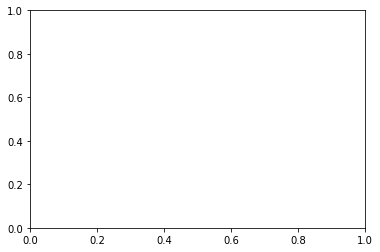

In [27]:
fig, ax = plt.subplots()

virus_articles.head(10)

In [28]:
import plotly.express as px  
# import plotly.plotly as py
# import plotly.graph_objs as go

# plotly.tools.set_credentials_file(username='HangqianLi', api_key='zD@9nS3g6zMdvQX')

fig = px.line(x= list(virus_articles.columns), y= virus_articles.loc['Virus_della_leucemia_felina'],title = 'Daily pageview').update_xaxes(rangeslider_visible=True).add_scatter(x=list(virus_articles.columns), y= virus_articles.loc['Virus_della_leucemia_felina'], name='Virus_della_leucemia_felina')  
fig.show() 
import plotly.io as pio

pio.write_html(fig, file='figure.html', auto_open=True)

In [29]:
virus_articles=virus_articles.drop(columns=['daily_mean'])
virus_articles.columns = pd.to_datetime(virus_articles.columns)


In [30]:
virus_articles

2018-01-01  2018-01-02  2018-01-03  \
index                                                                     
Virus_della_leucemia_felina                  11          27          20   
Malattia_da_virus_Ebola                       3          21          13   
Influenzavirus_A_sottotipo_H1N1              20          23          49   
Rhinovirus                                    6           9          12   
Virus_(informatica)                          26          70          74   
Herpesvirus_umano_3                           2           5           5   
Antivirus                                    19          31          26   
Virus_respiratorio_sinciziale_umano           6          11          18   

                                     2018-01-04  2018-01-05  2018-01-06  \
index                                                                     
Virus_della_leucemia_felina                  28          24           9   
Malattia_da_virus_Ebola                      23          28           5   
Influenzavirus_A_sottotipo_H1N1              52          46         108   
Rhinovirus                                   22          13          12   
Virus_(informatica)                          66          86          44   
Herpesvirus_umano_3                          14           6          13   
Antivirus                                    27          42          30   
Virus_respiratorio_sinciziale_umano          18          15          14   

                                     2018-01-07  2018-01-08  2018-01-09  \
index                                                                     
Virus_della_leucemia_felina                  13          36          30   
Malattia_da_virus_Ebola                      11          11          17   
Influenzavirus_A_sottotipo_H1N1             271         143          75   
Rhinovirus                                   21          18          19   
Virus_(informatica)                          67          94         107   
Herpesvirus_umano_3                           9          12          11   
Antivirus                                    24          54          45   
Virus_respiratorio_sinciziale_umano           9          21          17   

                                     2018-01-10  ...  2020-07-22  2020-07-23  \
index                                            ...                           
Virus_della_leucemia_felina                  34  ...          13          12   
Malattia_da_virus_Ebola                      18  ...         142          30   
Influenzavirus_A_sottotipo_H1N1              60  ...          37          27   
Rhinovirus                                   15  ...           8          10   
Virus_(informatica)                         168  ...          21          38   
Herpesvirus_umano_3                           5  ...          10           9   
Antivirus                                    80  ...          16          33   
Virus_respiratorio_sinciziale_umano          19  ...          11          10   

                                     2020-07-24  2020-07-25  2020-07-26  \
index                                                                     
Virus_della_leucemia_felina                  13           9           6   
Malattia_da_virus_Ebola                      25         126          30   
Influenzavirus_A_sottotipo_H1N1              30          70          36   
Rhinovirus                                   10          13           6   
Virus_(informatica)                          21          18          30   
Herpesvirus_umano_3                          10           5           7   
Antivirus                                    25          14          14   
Virus_respiratorio_sinciziale_umano          10           4           4   

                                     2020-07-27  2020-07-28  2020-07-29  \
index                                                                     
Virus_della_leucemia_felina                  10          11           7   
Malatti

In [31]:
titles=list(virus_articles.index)
titles

['Virus_della_leucemia_felina',
 'Malattia_da_virus_Ebola',
 'Influenzavirus_A_sottotipo_H1N1',
 'Rhinovirus',
 'Virus_(informatica)',
 'Herpesvirus_umano_3',
 'Antivirus',
 'Virus_respiratorio_sinciziale_umano']

In [32]:
years=virus_articles.columns
years

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
               '2020-07-30', '2020-07-31'],
              dtype='datetime64[ns]', length=943, freq=None)

In [33]:
virus_articles.loc['Virus_della_leucemia_felina']

2018-01-01    11
2018-01-02    27
2018-01-03    20
2018-01-04    28
2018-01-05    24
              ..
2020-07-27    10
2020-07-28    11
2020-07-29     7
2020-07-30     7
2020-07-31     8
Name: Virus_della_leucemia_felina, Length: 943, dtype: int64

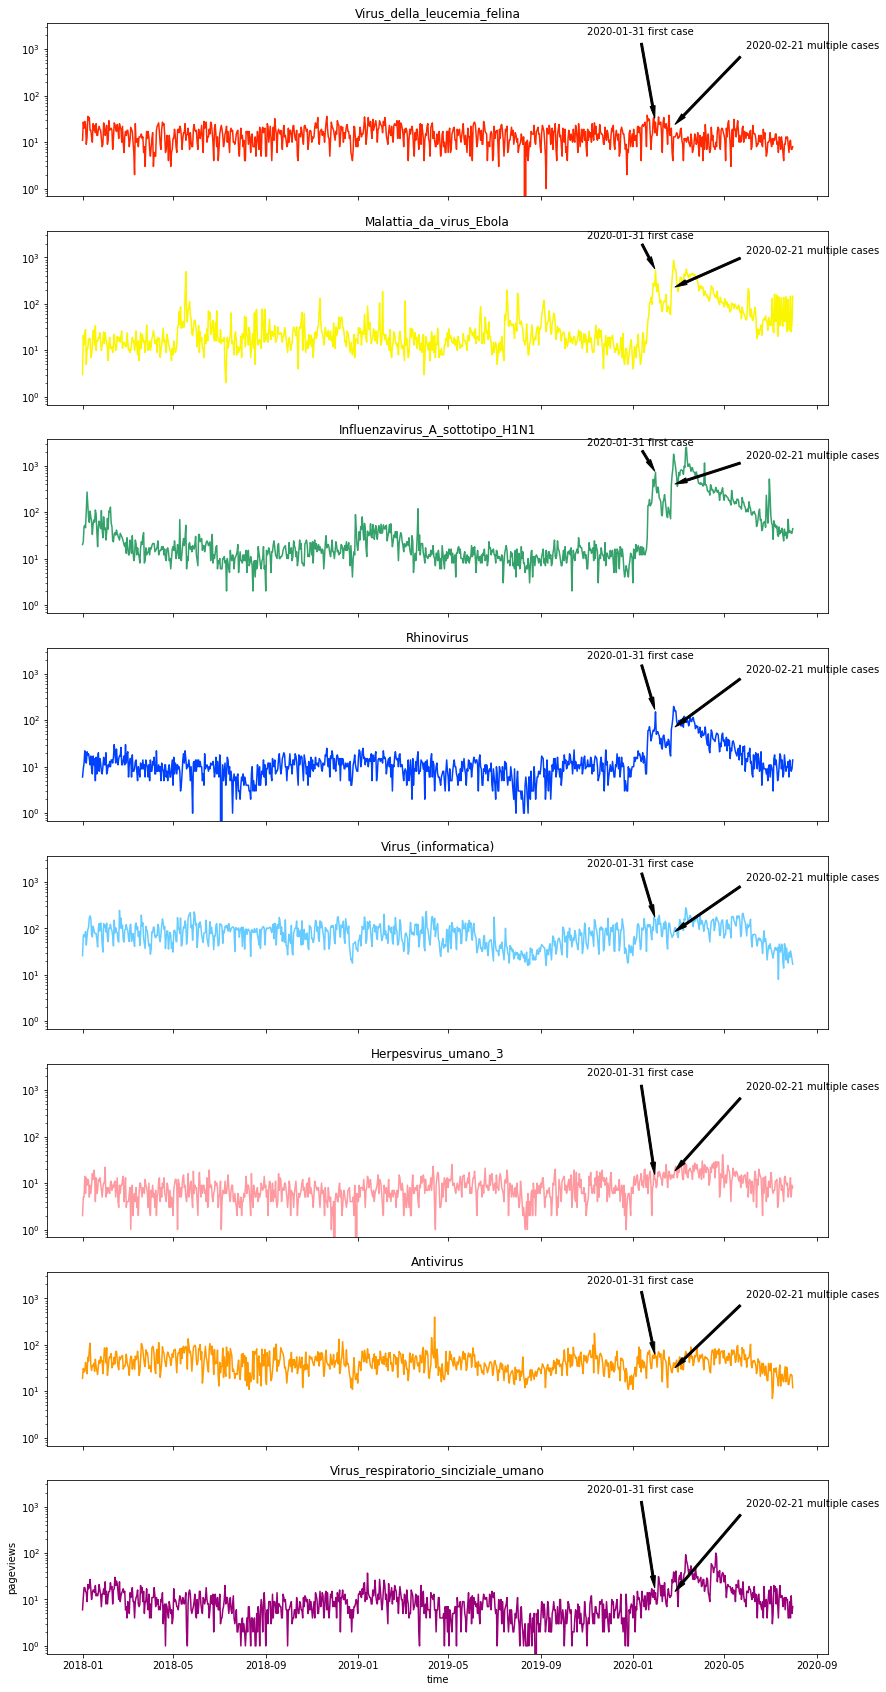

In [34]:
# import math
axs = plt.figure(figsize=(14,30)).subplots(len(titles), 1, sharey = True, sharex = True)
#highlight points
t0=pd.to_datetime('2020-01-31')
t1=pd.to_datetime('2020-02-21')
y0=virus_articles[t0]
y1=virus_articles[t1]
#Red #FF2800, Yellow #FAF500, Green #35A16B, Blue #0041FF, 
#Sky Blue ##0041FF, Pink #FF99A0, Orange #FF9900, Purple #9A0079
color= ['#FF2800','#FAF500','#35A16B','#0041FF','#66CCFF','#FF99A0','#FF9900','#9A0079']

for ax, t ,c in zip(axs.flat, titles, color):
#     row = (virus_articles.loc[t])
    
    x= years
#     y= np.log(virus_articles.loc[t]+1)
    y= virus_articles.loc[t]
    ax.plot(x,y,color=c)
    ax.set_yscale('log')
    ax.set_title(t)
    plt.xlabel('time')
    plt.ylabel('pageviews')
    ax.annotate('2020-01-31 first case', xy=(t0, y0[t]), xytext=(pd.to_datetime('2019-11-01'), y0[t]+2000),xycoords='data',arrowprops=dict(facecolor='black', shrink=0.05,headwidth=5., width=2))
    ax.annotate('2020-02-21 multiple cases', xy=(t1, y1[t]), xytext=(pd.to_datetime('2020-05-30'), y1[t]+1000),xycoords='data',arrowprops=dict(facecolor='black', shrink=0.05,headwidth=5., width=2))

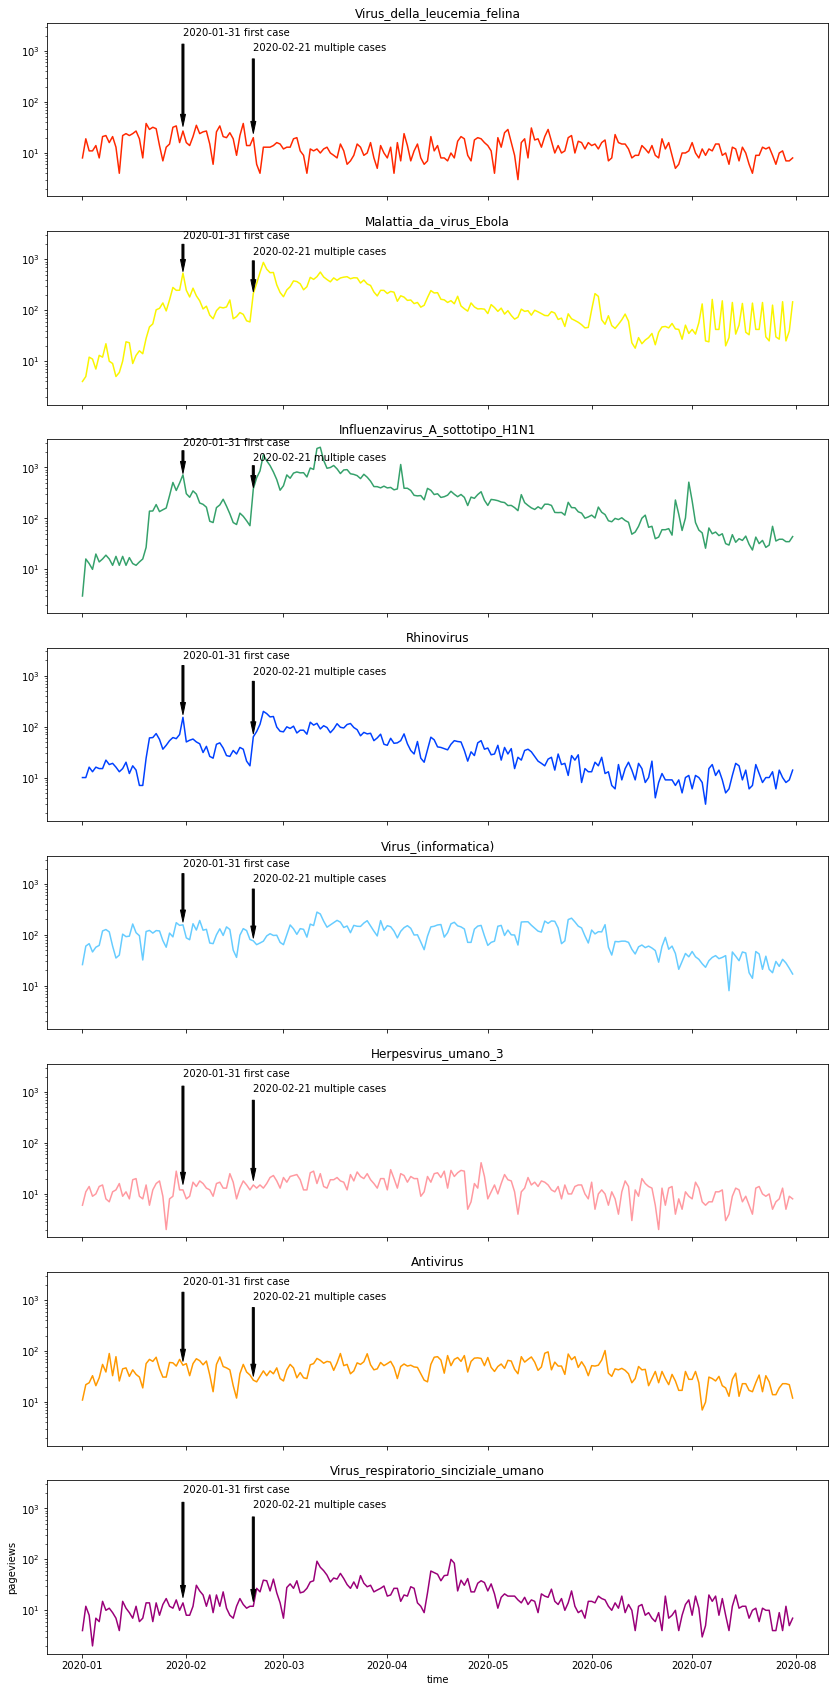

In [35]:
# import math
axs = plt.figure(figsize=(14,30)).subplots(len(titles), 1, sharey = True, sharex = True)
#highlight points
t0=pd.to_datetime('2020-01-31')
t1=pd.to_datetime('2020-02-21')
y0=virus_articles[t0]
y1=virus_articles[t1]
#Red #FF2800, Yellow #FAF500, Green #35A16B, Blue #0041FF, 
#Sky Blue ##0041FF, Pink #FF99A0, Orange #FF9900, Purple #9A0079
color= ['#FF2800','#FAF500','#35A16B','#0041FF','#66CCFF','#FF99A0','#FF9900','#9A0079']

for ax, t ,c in zip(axs.flat, titles, color):
#     row = (virus_articles.loc[t])
    
    x= years[730:,]
#     y= np.log(virus_articles.loc[t]+1)
    y= virus_articles.loc[t][730:,]
    ax.plot(x,y,color=c)
    ax.set_yscale('log')
    ax.set_title(t)
    plt.xlabel('time')
    plt.ylabel('pageviews')
    ax.annotate('2020-01-31 first case', xy=(t0, y0[t]), xytext=(t0, y0[t]+2000),xycoords='data',arrowprops=dict(facecolor='black', shrink=0.05,headwidth=5., width=2))
    ax.annotate('2020-02-21 multiple cases', xy=(t1, y1[t]), xytext=(t1, y1[t]+1000),xycoords='data',arrowprops=dict(facecolor='black', shrink=0.05,headwidth=5., width=2))

In [36]:
### ~ 3.2.3
### Your text here! ###
x = list(virus_articles.index)
y=virus_articles.loc['Virus_della_leucemia_felina']
# y=virus_articles[virus_articles.index=='Virus_della_leucemia_felina']
y

2018-01-01    11
2018-01-02    27
2018-01-03    20
2018-01-04    28
2018-01-05    24
              ..
2020-07-27    10
2020-07-28    11
2020-07-29     7
2020-07-30     7
2020-07-31     8
Name: Virus_della_leucemia_felina, Length: 943, dtype: int64

In [37]:
x

['Virus_della_leucemia_felina',
 'Malattia_da_virus_Ebola',
 'Influenzavirus_A_sottotipo_H1N1',
 'Rhinovirus',
 'Virus_(informatica)',
 'Herpesvirus_umano_3',
 'Antivirus',
 'Virus_respiratorio_sinciziale_umano']


### **Task 3.3**

Before we move on, let's make a final sanity check and analyze the distribution of pageviews over all articles in our dataset. You are given a function to calculate the **cumulative distribution function** (CDF) of a sample. The CDF is a function f(x) associated with a data sample. For each value x, f(x) represents the percentage of elements in your sample that have values smaller or equal to x (read more about it [here](https://en.wikipedia.org/wiki/Empirical_distribution_function)).
Your task is to:

1. Calculate the CDF of the distribution of pageviews across all days over articles. That is, a) calculate the total number of pageviews each article has received and then, b) calculate the CDF for these values.


2. Now plot this function using different scales for the x- and y-axis. You should plot it in 4 different ways:

    a. x-axis on linear scale, y-axis on linear scale
    
    b. x-axis on log scale, y-axis on linear scale
    
    c. x-axis on linear scale, y-axis on log scale
    
    d. x-axis on log scale, y-axis on log scale
    
3. **Discuss:** There is a pretty odd fact about the distribution of our data! Can you spot it and describe it? Which of the different plots (a-d) allows you to find this oddity? Why isn't this visible in the other plots?

---

**Hint:** You can use `plt.xscale` and `plt.yscale`.

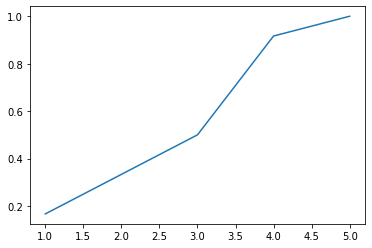

In [38]:
# This function is being given to you with a usage example :)! Make good use!

import numpy as np

def get_cdf(vals):
    # Input:
    # -- vals: an np.array of positive integers
    # Output:
    # -- x: an array containing all numbers from 1 to max(vals);
    # -- y: an array containing the (empirically calculated) probability that vals <= x
    
    y = np.cumsum(np.bincount(vals)[1:])
    y = y / y[-1]
    y = y
    x = list(range(1, max(vals) + 1))
    return x, y

vals = np.array([1,2,3,4,1,2,4,3,4,4,5,4])
x, y = get_cdf(vals)
plt.plot(x, y)
plt.show()

In [39]:
### ~ 3.3.1
### Your code here! ###
x, y = get_cdf(articles.total_view)

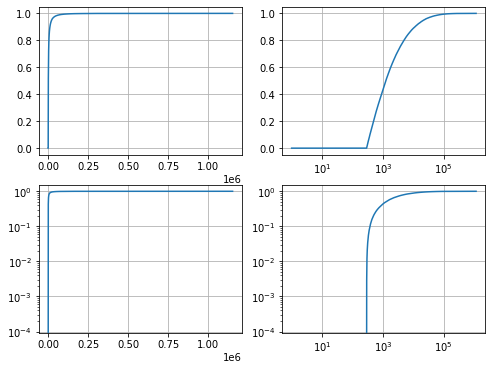

In [40]:
### ~ 3.3.2
### Your code here! ###
plt.figure(figsize=(8, 6))
# x-axis on linear scale, y-axis on linear scale
plt.subplot(221)
plt.plot(x, y)
# plt.xscale('linear')
# plt.yscale('linear')
# plt.title('x linear, y linear')
plt.grid(True)
# x-axis on log scale, y-axis on linear scale
plt.subplot(222)
plt.plot(x, y)
plt.xscale('log')
plt.yscale('linear')
# plt.title('x log, y linear')
plt.grid(True)
# x-axis on linear scale, y-axis on log scale
plt.subplot(223)
plt.plot(x, y)
plt.xscale('linear')
plt.yscale('log')
# plt.title('x log, y linear')
plt.grid(True)
#x-axis on log scale, y-axis on log scale
plt.subplot(224)
plt.plot(x, y)
plt.xscale('log')
plt.yscale('log')
# plt.title('x log, y linear')
plt.grid(True)

In [41]:
### ~ 3.3.3
### Your text here! ###



## *Step 4*: Analyzing Overall Pageview Volume


---
### **Task 4.1**

So far we have seen anecdotal examples. Now let’s move to the big picture! How did Wikipedia pageviews change in general? To gain a better understanding of how Wikipedia’s overall pageview volume has changed during the pandemic, you should do the following:

1. Calculate and visualize the pageviews trends across summed across **all** articles in Italian Wikipedia for the year 2020. (and only for 2020!). 
2. **Discuss**: what regular pattern (something that repeats over and over) do you see in the data?
3. Pre-process the data to remove this regular pattern and make the overall trend clearer. Repeat the plot with the processed data.

---

**Hint**: A convenient way to use `.groupby` alongside dates is to use the [`pd.Grouper`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html) class. Basically, it allows you to group by date periods given frequencies determined by the parameter `freq`. To read how to specify different types of frequencies, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). Recall that, in order to turn an index, column index -- or pretty much anything -- into a timestamp, you can use  [`pd.to_timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_timestamp.html).

In [42]:
articles_1=articles.drop(columns=['total_view','daily_mean'])
articles_1.columns = pd.to_datetime(articles_1.columns)
articles_1.head()

2018-01-01  2018-01-02  2018-01-03  2018-01-04  \
index                                                                          
Khulna                                 0           2           1           0   
Karim_Ansarifard                       1           5           1           1   
Poldhu                                 0           0           1           1   
Alice_(The_Sisters_of_Mercy)           0           1           0           0   
Palmyra                                1           4           0           0   

                              2018-01-05  2018-01-06  2018-01-07  2018-01-08  \
index                                                                          
Khulna                                 0           2           0           2   
Karim_Ansarifard                       1           3           6           4   
Poldhu                                 0           1           0           2   
Alice_(The_Sisters_of_Mercy)           1           1           1           1   
Palmyra                                0           2          11           2   

                              2018-01-09  2018-01-10  ...  2020-07-22  \
index                                                 ...               
Khulna                                 0           1  ...           0   
Karim_Ansarifard                       5           6  ...           2   
Poldhu                                 2           3  ...           0   
Alice_(The_Sisters_of_Mercy)           0           0  ...           0   
Palmyra                                0           0  ...           0   

                              2020-07-23  2020-07-24  2020-07-25  2020-07-26  \
index                                                                          
Khulna                                 1           1           0           1   
Karim_Ansarifard                       2           0           1           2   
Poldhu                                 2           2           0           0   
Alice_(The_Sisters_of_Mercy)           0           0           0           0   
Palmyra                                0           1           0           0   

                              2020-07-27  2020-07-28  2020-07-29  2020-07-30  \
index                                                                          
Khulna                                 1           0           2           1   
Karim_Ansarifard                       0           1           0           0   
Poldhu                                 0           2           1           2   
Alice_(The_Sisters_of_Mercy)           1           0           0           0   
Palmyra                                0           1           0           0   

                              2020-07-31  
index                                     
Khulna                                 2  
Karim_Ansarifard                       0  
Poldhu                                 1  
Alice_(The_Sisters_of_Mercy)           0  
Palmyra                                0  

[5 rows x 943 columns]

In [43]:
articles_2020=articles_1.iloc[:, 730: ]
articles_2020.head()

2020-01-01  2020-01-02  2020-01-03  2020-01-04  \
index                                                                          
Khulna                                 2           0           1           1   
Karim_Ansarifard                       4           0           0           4   
Poldhu                                 0           2           1           0   
Alice_(The_Sisters_of_Mercy)           0           0           2           1   
Palmyra                                0           0           0           0   

                              2020-01-05  2020-01-06  2020-01-07  2020-01-08  \
index                                                                          
Khulna                                 2           1           1           0   
Karim_Ansarifard                       1           0           0           0   
Poldhu                                 0           0           0           4   
Alice_(The_Sisters_of_Mercy)           0           0           2           0   
Palmyra                                1           0           0           0   

                              2020-01-09  2020-01-10  ...  2020-07-22  \
index                                                 ...               
Khulna                                 0           0  ...           0   
Karim_Ansarifard                       0           1  ...           2   
Poldhu                                 1           1  ...           0   
Alice_(The_Sisters_of_Mercy)           1           0  ...           0   
Palmyra                                1           0  ...           0   

                              2020-07-23  2020-07-24  2020-07-25  2020-07-26  \
index                                                                          
Khulna                                 1           1           0           1   
Karim_Ansarifard                       2           0           1           2   
Poldhu                                 2           2           0           0   
Alice_(The_Sisters_of_Mercy)           0           0           0           0   
Palmyra                                0           1           0           0   

                              2020-07-27  2020-07-28  2020-07-29  2020-07-30  \
index                                                                          
Khulna                                 1           0           2           1   
Karim_Ansarifard                       0           1           0           0   
Poldhu                                 0           2           1           2   
Alice_(The_Sisters_of_Mercy)           1           0           0           0   
Palmyra                                0           1           0           0   

                              2020-07-31  
index                                     
Khulna                                 2  
Karim_Ansarifard                       0  
Poldhu                                 1  
Alice_(The_Sisters_of_Mercy)           0  
Palmyra                                0  

[5 rows x 213 columns]

In [44]:
plt.figure(figsize=(14,3)) # change this if needed

### ~ 4.1.1
### Your code here! ###
articles_2020.head()
y=articles_2020.sum()
x=articles_2020.columns

<Figure size 1008x216 with 0 Axes>

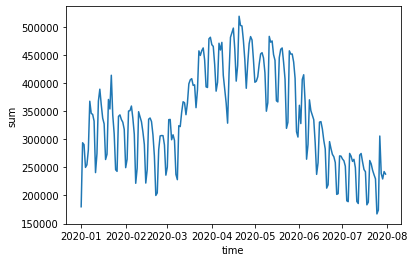

In [45]:
#折线图
plt.plot(x,y)
plt.xlabel("time")#横坐标名字
plt.ylabel("sum")#纵坐标名字
# plt.legend(loc = "best")
plt.show()

In [46]:
### ~ 4.1.2
### Your text here! ###
#奇怪的周期
y.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
               '2020-07-30', '2020-07-31'],
              dtype='datetime64[ns]', length=213, freq=None)

In [47]:
plt.figure(figsize=(14,3)) # change this if needed

### ~ 4.1.3
### Your code here! ###

<Figure size 1008x216 with 0 Axes>

<Figure size 1008x216 with 0 Axes>

### **Task 4.2**

To get an even clearer picture, your task now is to compare the pageview time series of the current year (2020) with the time series of the previous year (2019).

1. Make a visualization where the two years are somehow "aligned", that is, where it is possible to compare the same time of year across the two years. Additionally, your visualization should highlight the date on which the nationwide lockdown started in Italy, 9 March 2020. Preprocess each one of the time series (for each year) the same way you did in Task 4.1.

3. **Discuss:** What changed from 2019 to 2020? Form and justify hypotheses about  the reasons behind this change.

---

**Hint**: In order to use two different y-axes in the same plot, you can use plt.twiny() or ax.twinx() (the latter if you are using the subplots environment;  [See this example](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/two_scales.html)).

In [48]:
plt.figure(figsize=(14,3)) # change this if needed

### ~ 4.2.1
## Your code here! ###
articles_2019=articles_1.iloc[:,365:730]
articles_2019.head()

2019-01-01  2019-01-02  2019-01-03  2019-01-04  \
index                                                                          
Khulna                                 8           1           0           1   
Karim_Ansarifard                       0           1           3           1   
Poldhu                                 1           0           0           2   
Alice_(The_Sisters_of_Mercy)           3           0           1           0   
Palmyra                                0           0           3           0   

                              2019-01-05  2019-01-06  2019-01-07  2019-01-08  \
index                                                                          
Khulna                                 1           2           0           1   
Karim_Ansarifard                       2           5          11           9   
Poldhu                                 1           2           5           3   
Alice_(The_Sisters_of_Mercy)           1           1           0           1   
Palmyra                                0           0           3           0   

                              2019-01-09  2019-01-10  ...  2019-12-22  \
index                                                 ...               
Khulna                                 0           0  ...           0   
Karim_Ansarifard                       2           1  ...           0   
Poldhu                                 1           2  ...           1   
Alice_(The_Sisters_of_Mercy)           0           0  ...           1   
Palmyra                                1           0  ...           1   

                              2019-12-23  2019-12-24  2019-12-25  2019-12-26  \
index                                                                          
Khulna                                 0           0           1           0   
Karim_Ansarifard                       2           2           1           0   
Poldhu                                 1           0           0           2   
Alice_(The_Sisters_of_Mercy)           2           0           0           0   
Palmyra                                0           0           0           1   

                              2019-12-27  2019-12-28  2019-12-29  2019-12-30  \
index                                                                          
Khulna                                 1           1           1           0   
Karim_Ansarifard                       1           1           2           0   
Poldhu                                 2           1           3           0   
Alice_(The_Sisters_of_Mercy)           0           1           0           0   
Palmyra                                0           0           0           0   

                              2019-12-31  
index                                     
Khulna                                 0  
Karim_Ansarifard                       1  
Poldhu                                 0  
Alice_(The_Sisters_of_Mercy)           0  
Palmyra                                0  

[5 rows x 365 columns]

<Figure size 1008x216 with 0 Axes>

In [49]:
### ~ 4.2.2
### Your text here! ###

## *Step 5*: Fiddling with Topics

---
### **Task 5.1**

We now turn to a different question: what topics were impacted by the lockdown? 
To start unpacking this question, your task now is to aggregate, for each day, all pageviews that went to each one of the 64 topics. 

There are multiple ways to do this, but for the sake of this exercise, you must create a dataframe where each row contains the number of pageviews a topic obtained on a given day! Example:

~~~
index       date                   views             
TOPIC1      2019-01-01             101              
TOPIC1      2019-01-02             151             
(...)       (...)                  (...)
TOPICK      2019-01-01             1010              
TOPICK      2019-01-02             2123            
(...)       (...)                  (...)
~~~

---

**Hint**: You've should find a way to make the index in the dataframe with the topics be the same as the index in the dataframes with the articles. See the file `mapping.pickle`.

**Hint**: You may want to use `.melt`.

In [50]:
topics_data.head()

index  Geography.Regions.Asia.Central Asia  \
0   Chinese_food_therapy                                False   
1      Battle_of_Naissus                                False   
2  Battle_of_Stoke_Field                                False   
3            Smooth_newt                                False   
4     Vicente_Aleixandre                                False   

   Geography.Regions.Europe.Eastern Europe  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

   History and Society.Military and warfare  Culture.Media.Television  \
0                                     False                     False   
1                                      True                     False   
2                                      True                     False   
3                                     False                     False   
4                                     False                     False   

   History and Society.Education  Culture.Media.Books  \
0                          False                False   
1                          False                False   
2                          False                False   
3                          False                False   
4                          False                False   

   Geography.Regions.Africa.Africa*  Culture.Visual arts.Architecture  \
0                             False                             False   
1                             False                             False   
2                             False                             False   
3                             False                             False   
4                             False                             False   

   Culture.Biography.Women  ...  STEM.Mathematics  \
0                    False  ...             False   
1                    False  ...             False   
2                    False  ...             False   
3                    False  ...             False   
4                    False  ...             False   

   Geography.Regions.Asia.West Asia  STEM.Chemistry  \
0                             False           False   
1                             False           False   
2                             False           False   
3                             False           False   
4                             False           False   

   Geography.Regions.Europe.Northern Europe  Culture.Media.Video games  \
0                                     False                      False   
1                                     False                      False   
2                                      True                      False   
3                                     False                      False   
4                                     False                      False   

   Geography.Regions.Asia.Southeast Asia  Culture.Media.Entertainment  \
0                                  False                        False   
1                                  False                        False   
2                                  False                        False   
3                                  False                        False   
4                                  False                        False   

   Culture.Media.Music  Geography.Regions.Asia.Asia*  \
0                False                          True   
1                False                         False   
2                False                         False   
3                False                         False   
4                False                         False   

   Geography.Regions.Asia.North Asia  
0                              False  
1                              False  
2                              False  
3                              False  
4                              False  

[5 rows x 65 columns]

In [51]:
### ~ 5.1.1
### Your code here! ###

# articles_1['C'] = articles_1['U'].map(max_d)

topics=pd.melt(topics_data,id_vars=['index'])#,id_vars=['col2']
topics

index  \
0                      Chinese_food_therapy   
1                         Battle_of_Naissus   
2                     Battle_of_Stoke_Field   
3                               Smooth_newt   
4                        Vicente_Aleixandre   
...                                     ...   
2279099                         Banca_Akros   
2279100                     Arms_Around_You   
2279101                   Gioventù_bruciata   
2279102  Power_Rangers:_Battle_for_the_Grid   
2279103        6th_Pioneer_Regiment_(Italy)   

                                    variable  value  
0        Geography.Regions.Asia.Central Asia  False  
1        Geography.Regions.Asia.Central Asia  False  
2        Geography.Regions.Asia.Central Asia  False  
3        Geography.Regions.Asia.Central Asia  False  
4        Geography.Regions.Asia.Central Asia  False  
...                                      ...    ...  
2279099    Geography.Regions.Asia.North Asia  False  
2279100    Geography.Regions.Asia.North Asia  False  
2279101    Geography.Regions.Asia.North Asia  False  
2279102    Geography.Regions.Asia.North Asia  False  
2279103    Geography.Regions.Asia.North Asia  False  

[2279104 rows x 3 columns]

In [52]:

topics.loc[topics['index']=='6th_Pioneer_Regiment_(Italy)']

index  \
35610    6th_Pioneer_Regiment_(Italy)   
71221    6th_Pioneer_Regiment_(Italy)   
106832   6th_Pioneer_Regiment_(Italy)   
142443   6th_Pioneer_Regiment_(Italy)   
178054   6th_Pioneer_Regiment_(Italy)   
...                               ...   
2136659  6th_Pioneer_Regiment_(Italy)   
2172270  6th_Pioneer_Regiment_(Italy)   
2207881  6th_Pioneer_Regiment_(Italy)   
2243492  6th_Pioneer_Regiment_(Italy)   
2279103  6th_Pioneer_Regiment_(Italy)   

                                         variable  value  
35610         Geography.Regions.Asia.Central Asia  False  
71221     Geography.Regions.Europe.Eastern Europe  False  
106832   History and Society.Military and warfare   True  
142443                   Culture.Media.Television  False  
178054              History and Society.Education  False  
...                                           ...    ...  
2136659     Geography.Regions.Asia.Southeast Asia  False  
2172270               Culture.Media.Entertainment  False  
2207881                       Culture.Media.Music  False  
2243492              Geography.Regions.Asia.Asia*  False  
2279103         Geography.Regions.Asia.North Asia  False  

[64 rows x 3 columns]

In [53]:
topics=topics[topics['value']].drop(columns=['value'])

In [54]:
topics

index  \
326                         Aleksandr_Nedovyesov   
387                            Nuristan_Province   
551                               Tatar_language   
1985             Tajik_Soviet_Socialist_Republic   
2311                                Wakhjir_Pass   
...                                          ...   
2278506                    The_Red_and_the_White   
2278549   1937_Soviet_Union_legislative_election   
2278744                  1905_Russian_Revolution   
2278857                           Tupolev_ANT-16   
2279058  The_Development_of_Capitalism_in_Russia   

                                    variable  
326      Geography.Regions.Asia.Central Asia  
387      Geography.Regions.Asia.Central Asia  
551      Geography.Regions.Asia.Central Asia  
1985     Geography.Regions.Asia.Central Asia  
2311     Geography.Regions.Asia.Central Asia  
...                                      ...  
2278506    Geography.Regions.Asia.North Asia  
2278549    Geography.Regions.Asia.North Asia  
2278744    Geography.Regions.Asia.North Asia  
2278857    Geography.Regions.Asia.North Asia  
2279058    Geography.Regions.Asia.North Asia  

[102313 rows x 2 columns]

In [55]:
topics=topics.rename(columns={'index':'article_name','variable':'group_name'})
topics

article_name  \
326                         Aleksandr_Nedovyesov   
387                            Nuristan_Province   
551                               Tatar_language   
1985             Tajik_Soviet_Socialist_Republic   
2311                                Wakhjir_Pass   
...                                          ...   
2278506                    The_Red_and_the_White   
2278549   1937_Soviet_Union_legislative_election   
2278744                  1905_Russian_Revolution   
2278857                           Tupolev_ANT-16   
2279058  The_Development_of_Capitalism_in_Russia   

                                  group_name  
326      Geography.Regions.Asia.Central Asia  
387      Geography.Regions.Asia.Central Asia  
551      Geography.Regions.Asia.Central Asia  
1985     Geography.Regions.Asia.Central Asia  
2311     Geography.Regions.Asia.Central Asia  
...                                      ...  
2278506    Geography.Regions.Asia.North Asia  
2278549    Geography.Regions.Asia.North Asia  
2278744    Geography.Regions.Asia.North Asia  
2278857    Geography.Regions.Asia.North Asia  
2279058    Geography.Regions.Asia.North Asia  

[102313 rows x 2 columns]

In [56]:
topics['article_name']=topics['article_name'].map(mapping)


In [57]:
topics

article_name  \
326                                   Oleksandr_Nedovjesov   
387                                               Nurestan   
551                                          Lingua_tatara   
1985                Repubblica_Socialista_Sovietica_Tagika   
2311                                      Passo_del_Vachir   
...                                                    ...   
2278506                          L'armata_a_cavallo_(film)   
2278549  Elezioni_del_Soviet_Supremo_dell'Unione_Soviet...   
2278744                         Rivoluzione_russa_del_1905   
2278857                                     Tupolev_ANT-16   
2279058              Lo_sviluppo_del_capitalismo_in_Russia   

                                  group_name  
326      Geography.Regions.Asia.Central Asia  
387      Geography.Regions.Asia.Central Asia  
551      Geography.Regions.Asia.Central Asia  
1985     Geography.Regions.Asia.Central Asia  
2311     Geography.Regions.Asia.Central Asia  
...                                      ...  
2278506    Geography.Regions.Asia.North Asia  
2278549    Geography.Regions.Asia.North Asia  
2278744    Geography.Regions.Asia.North Asia  
2278857    Geography.Regions.Asia.North Asia  
2279058    Geography.Regions.Asia.North Asia  

[102313 rows x 2 columns]

In [250]:
articles=articles.drop(columns=['daily_mean'])
articles

2018-01-01  2018-01-02  2018-01-03  2018-01-04  \
index                                                                          
Khulna                                 0           2           1           0   
Karim_Ansarifard                       1           5           1           1   
Poldhu                                 0           0           1           1   
Alice_(The_Sisters_of_Mercy)           0           1           0           0   
Palmyra                                1           4           0           0   
...                                  ...         ...         ...         ...   
Metodologia_della_formazione           1           8           8           9   
Metal_Black                            0           0           0           0   
Tonino_Accolla                        66          98          84          95   
The_United_States_Steel_Hour           0           1           4           0   
Mauro_Manotas                          1           0           0           0   

                              2018-01-05  2018-01-06  2018-01-07  2018-01-08  \
index                                                                          
Khulna                                 0           2           0           2   
Karim_Ansarifard                       1           3           6           4   
Poldhu                                 0           1           0           2   
Alice_(The_Sisters_of_Mercy)           1           1           1           1   
Palmyra                                0           2          11           2   
...                                  ...         ...         ...         ...   
Metodologia_della_formazione           4           4           2           5   
Metal_Black                            1           0           0           0   
Tonino_Accolla                        99          79          59          81   
The_United_States_Steel_Hour           0           0           0           2   
Mauro_Manotas                          1           0           0           0   

                              2018-01-09  2018-01-10  ...  2020-07-22  \
index                                                 ...               
Khulna                                 0           1  ...           0   
Karim_Ansarifard                       5           6  ...           2   
Poldhu                                 2           3  ...           0   
Alice_(The_Sisters_of_Mercy)           0           0  ...           0   
Palmyra                                0           0  ...           0   
...                                  ...         ...  ...         ...   
Metodologia_della_formazione          16          15  ...           9   
Metal_Black                            0           0  ...           0   
Tonino_Accolla                        77          83  ...          43   
The_United_States_Steel_Hour           0           0  ...           1   
Mauro_Manotas                          0           0  ...           0   

                              2020-07-23  2020-07-24  2020-07-25  2020-07-26  \
index                                                                          
Khulna                                 1           1           0           1   
Karim_Ansarifard                       2           0           1           2   
Poldhu                                 2           2           0           0   
Alice_(The_Sisters_of_Mercy)           0           0           0           0   
Palmyra                                0           1           0           0   
...                                  ...         ...         ...         ...   
Metodologia_della_formazione           8           7           7           2   
Metal_Black                            0           0           0           1   
Tonino_Accolla                        40          39          46          33   
The_United_States_Steel_Hour           1           2           0           0   
Mauro_Manotas                         

In [252]:
topic_views=pd.merge(articles, topics, how='right',right_on="article_name", left_on="index" )
topic_views

2018-01-01 00:00:00  2018-01-02 00:00:00  2018-01-03 00:00:00  \
0                         0                    0                    1   
1                         0                    0                    1   
2                         0                    0                    1   
3                         0                    0                    1   
4                         1                    0                    0   
...                     ...                  ...                  ...   
102308                    0                    1                    1   
102309                    0                    0                    0   
102310                    0                    2                    0   
102311                    0                    0                    0   
102312                    0                    0                    1   

        2018-01-04 00:00:00  2018-01-05 00:00:00  2018-01-06 00:00:00  \
0                         1                    1                    1   
1                         1                    1                    1   
2                         1                    1                    1   
3                         1                    1                    1   
4                         0                    0                    2   
...                     ...                  ...                  ...   
102308                    1                    0                    1   
102309                    0                    0                    0   
102310                    0                    2                    0   
102311                    0                    0                    0   
102312                    2                    0                    3   

        2018-01-07 00:00:00  2018-01-08 00:00:00  2018-01-09 00:00:00  \
0                         0                    1                    1   
1                         0                    1                    1   
2                         0                    1                    1   
3                         0                    1                    1   
4                         0                    0                    1   
...                     ...                  ...                  ...   
102308                    0                    0                    0   
102309                    0                    0                    0   
102310                    1                    0                    0   
102311                    0                    0                    0   
102312                    3                    1                    2   

        2018-01-10 00:00:00  ...  2020-07-24 00:00:00  2020-07-25 00:00:00  \
0                         0  ...                    0                    0   
1                         0  ...                    0                    0   
2                         0  ...                    0                    0   
3                         0  ...                    0                    0   
4                         1  ...                    0                    0   
...                     ...  ...                  ...                  ...   
102308                    0  ...                    1                    0   
102309                    0  ...                    1                    0   
102310                    0  ...                    1                    2   
102311                    0  ...                    0                    0   
102312                    0  ...                    0                    2   

        2020-07-26 00:00:00  2020-07-27 00:00:00  2020-07-28 00:00:00  \
0                         0                    1                    0   
1                         0                    1                    0   
2                         0                    1                    0   
3                         0                    1                    0   
4                         1                    0                    1   
..

In [262]:
# topic_views=topic_views.drop(columns=['article_name'])
# topic_views=topic_views.reset_index("group_name")
# topic_views=topic_views.set_index("group_name")
topic_views.columns = pd.to_datetime(topic_views.columns)
topic_views

2018-01-01  2018-01-02  2018-01-03  \
group_name                                                                
Geography.Regions.Asia.Central Asia           0           0           1   
Culture.Biography.Biography*                  0           0           1   
Culture.Sports                                0           0           1   
Geography.Regions.Asia.Asia*                  0           0           1   
Geography.Regions.Asia.Central Asia           1           0           0   
...                                         ...         ...         ...   
Geography.Regions.Asia.Asia*                  0           1           1   
Geography.Regions.Asia.Asia*                  0           0           0   
Geography.Regions.Asia.Asia*                  0           2           0   
Geography.Regions.Asia.Asia*                  0           0           0   
Geography.Regions.Asia.Asia*                  0           0           1   

                                     2018-01-04  2018-01-05  2018-01-06  \
group_name                                                                
Geography.Regions.Asia.Central Asia           1           1           1   
Culture.Biography.Biography*                  1           1           1   
Culture.Sports                                1           1           1   
Geography.Regions.Asia.Asia*                  1           1           1   
Geography.Regions.Asia.Central Asia           0           0           2   
...                                         ...         ...         ...   
Geography.Regions.Asia.Asia*                  1           0           1   
Geography.Regions.Asia.Asia*                  0           0           0   
Geography.Regions.Asia.Asia*                  0           2           0   
Geography.Regions.Asia.Asia*                  0           0           0   
Geography.Regions.Asia.Asia*                  2           0           3   

                                     2018-01-07  2018-01-08  2018-01-09  \
group_name                                                                
Geography.Regions.Asia.Central Asia           0           1           1   
Culture.Biography.Biography*                  0           1           1   
Culture.Sports                                0           1           1   
Geography.Regions.Asia.Asia*                  0           1           1   
Geography.Regions.Asia.Central Asia           0           0           1   
...                                         ...         ...         ...   
Geography.Regions.Asia.Asia*                  0           0           0   
Geography.Regions.Asia.Asia*                  0           0           0   
Geography.Regions.Asia.Asia*                  1           0           0   
Geography.Regions.Asia.Asia*                  0           0           0   
Geography.Regions.Asia.Asia*                  3           1           2   

                                     2018-01-10  ...  2020-07-22  2020-07-23  \
group_name                                       ...                           
Geography.Regions.Asia.Central Asia           0  ...           0           0   
Culture.Biography.Biography*                  0  ...           0           0   
Culture.Sports                                0  ...           0           0   
Geography.Regions.Asia.Asia*                  0  ...           0           0   
Geography.Regions.Asia.Central Asia           1  ...           0           0   
...                                         ...  ...         ...         ...   
Geography.Regions.Asia.Asia*                  0  ...           1           0   
Geography.Regions.Asia.Asia*                  0  ...           1           3   
Geography.Regions.Asia.Asia*                  0  ...           1           3   
Geography.Regions.Asia.Asia*                  0  ...           0           1   
Geography.Regions.Asia.Asia*                  0  ...           2           6   

                                     2020-07-24  2020-07-25  2020-07

In [264]:
topic_views['total_view']=topic_views.sum()
topic_views

2018-01-01 00:00:00  2018-01-02 00:00:00  \
group_name                                                                      
Geography.Regions.Asia.Central Asia                    0                    0   
Culture.Biography.Biography*                           0                    0   
Culture.Sports                                         0                    0   
Geography.Regions.Asia.Asia*                           0                    0   
Geography.Regions.Asia.Central Asia                    1                    0   
...                                                  ...                  ...   
Geography.Regions.Asia.Asia*                           0                    1   
Geography.Regions.Asia.Asia*                           0                    0   
Geography.Regions.Asia.Asia*                           0                    2   
Geography.Regions.Asia.Asia*                           0                    0   
Geography.Regions.Asia.Asia*                           0                    0   

                                     2018-01-03 00:00:00  2018-01-04 00:00:00  \
group_name                                                                      
Geography.Regions.Asia.Central Asia                    1                    1   
Culture.Biography.Biography*                           1                    1   
Culture.Sports                                         1                    1   
Geography.Regions.Asia.Asia*                           1                    1   
Geography.Regions.Asia.Central Asia                    0                    0   
...                                                  ...                  ...   
Geography.Regions.Asia.Asia*                           1                    1   
Geography.Regions.Asia.Asia*                           0                    0   
Geography.Regions.Asia.Asia*                           0                    0   
Geography.Regions.Asia.Asia*                           0                    0   
Geography.Regions.Asia.Asia*                           1                    2   

                                     2018-01-05 00:00:00  2018-01-06 00:00:00  \
group_name                                                                      
Geography.Regions.Asia.Central Asia                    1                    1   
Culture.Biography.Biography*                           1                    1   
Culture.Sports                                         1                    1   
Geography.Regions.Asia.Asia*                           1                    1   
Geography.Regions.Asia.Central Asia                    0                    2   
...                                                  ...                  ...   
Geography.Regions.Asia.Asia*                           0                    1   
Geography.Regions.Asia.Asia*                           0                    0   
Geography.Regions.Asia.Asia*                           2                    0   
Geography.Regions.Asia.Asia*                           0                    0   
Geography.Regions.Asia.Asia*                           0                    3   

                                     2018-01-07 00:00:00  2018-01-08 00:00:00  \
group_name                                                                      
Geography.Regions.Asia.Central Asia                    0                    1   
Culture.Biography.Biography*                           0                    1   
Culture.Sports                                         0                    1   
Geography.Regions.Asia.Asia*                           0                    1   
Geography.Regions.Asia.Central Asia                    0                    0   
...                                                  ...                  ...   
Geography.Regions.Asia.Asia*                           0                    0   
Geography.Regions.Asia.Asia*                           0                    0   
Geography.Regions.Asia.Asia*                           1         

In [62]:
# topic_views1=topic_views.set_index("group_name")

In [63]:
topic_view2=topic_views.groupby("group_name").sum()
topic_view2=topic_view2.reset_index()

In [64]:
topic_view2

group_name  2018-01-01 00:00:00  2018-01-02 00:00:00  \
0   Culture.Biography.Biography*                58085                86933   
1        Culture.Biography.Women                12370                17811   
2         Culture.Food and drink                 2093                 3788   
3       Culture.Internet culture                 6441                10743   
4            Culture.Linguistics                 1606                 3565   
..                           ...                  ...                  ...   
59        STEM.Medicine & Health                 5574                13943   
60                  STEM.Physics                 2203                 5345   
61                    STEM.STEM*                28743                60495   
62                    STEM.Space                 1310                 2262   
63               STEM.Technology                 7815                15249   

    2018-01-03 00:00:00  2018-01-04 00:00:00  2018-01-05 00:00:00  \
0                 88693                94648                90808   
1                 17743                20312                19309   
2                  3956                 4149                 3863   
3                 11252                10813                10144   
4                  3488                 3696                 3465   
..                  ...                  ...                  ...   
59                13461                13875                12648   
60                 5804                 6412                 5817   
61                63281                66305                61418   
62                 2376                 2642                 2337   
63                16071                16179                15653   

    2018-01-06 00:00:00  2018-01-07 00:00:00  2018-01-08 00:00:00  \
0                 73282                83489                98398   
1                 16267                17900                20594   
2                  3230                 3669                 4777   
3                  8427                 9316                11617   
4                  2934                 2906                 3625   
..                  ...                  ...                  ...   
59                10412                12575                17123   
60                 4473                 5598                 7240   
61                47546                57522                78656   
62                 2193                 2864                 2765   
63                11460                13830                19076   

    2018-01-09 00:00:00  ...  2020-07-23 00:00:00  2020-07-24 00:00:00  \
0                102231  ...                53177                57053   
1                 20570  ...                10716                10776   
2                  5164  ...                 2543                 2293   
3                 11749  ...                 8408                 7437   
4                  4113  ...                 2937                 2043   
..                  ...  ...                  ...                  ...   
59                18438  ...                 8939                 8092   
60                 8172  ...                 3992                 3491   
61                83208  ...                46732                42458   
62                 3000  ...                 1552                 1375   
63                20364  ...                11851                11048   

    2020-07-25 00:00:00  2020-07-26 00:00:00  2020-07-27 00:00:00  \
0                 42743                43668               121292   
1                  8714                10370                11680   
2                  1613                 1592                 2438   
3                  5218                 5014                 7660   
4                  1451                 1712                 3860   
..                  ...                  ...                  ...   
59                 6070                 5993           

In [65]:
topic_view3=pd.melt(topic_view2, id_vars =['group_name'])
topic_view3=topic_view3.sort_values(by=['group_name','variable'])
topic_view3

group_name             variable     value
0      Culture.Biography.Biography*  2018-01-01 00:00:00     58085
64     Culture.Biography.Biography*  2018-01-02 00:00:00     86933
128    Culture.Biography.Biography*  2018-01-03 00:00:00     88693
192    Culture.Biography.Biography*  2018-01-04 00:00:00     94648
256    Culture.Biography.Biography*  2018-01-05 00:00:00     90808
...                             ...                  ...       ...
60159               STEM.Technology  2020-07-28 00:00:00     11023
60223               STEM.Technology  2020-07-29 00:00:00     11131
60287               STEM.Technology  2020-07-30 00:00:00     12406
60351               STEM.Technology  2020-07-31 00:00:00     10467
60415               STEM.Technology           total_view  13968351

[60416 rows x 3 columns]

### **Task 5.2**

Now to the **grand finale**. We will consider two periods:
- the 35 days before the quarantine started (in the 9th of March); and 
- the 34 days after the quarantined started (including the day of the quarantine itself).

Create a visualization where you can compare, for each topic, the mean **number of views** in the aforementioned periods (that is, before and after the quarantine started). **Although there is a very large number of topics, your visualization should be a compact panel, small enough to fit on an A4 page.**

---

**Hint**: [Hoooray](https://seaborn.pydata.org/examples/index.html).

In [66]:
import seaborn as sns
plt.figure(figsize=(14,10)) # change this if needed

### ~ 5.2
### Your code here! ###
#date 2.3-3.8
topic_view4=topic_view3.loc[topic_view3.variable=='2020-02-02']
topic_view5=topic_view3.loc[topic_view3.variable=='2020-02-03']
topic_view6=topic_view4.append(topic_view5)
topic_view6





Empty DataFrame
Columns: [group_name, variable, value]
Index: []

<Figure size 1008x720 with 0 Axes>

In [67]:
def get_date_list(begin_date,end_date):

    date_list = [x.strftime('%Y-%m-%d') for x in list(pd.date_range(start=begin_date, end=end_date))]

    return date_list

time1=get_date_list('2020-02-03','2020-03-08')
time2=get_date_list('2020-03-09','2020-04-12')
type(time1)

list

In [68]:
time1_views=topic_view3.loc[topic_view3.variable=='2020-02-03']
for timei in time1[1:]:
    topic_viewi=topic_view3.loc[topic_view3.variable==timei]
    time1_views=time1_views.append(topic_viewi)
time1_views

Empty DataFrame
Columns: [group_name, variable, value]
Index: []

In [69]:
time2_views=topic_view3.loc[topic_view3.variable=='2020-03-09']
for timei in time2[1:]:
    topic_viewi=topic_view3.loc[topic_view3.variable==timei]
    time2_views=time2_views.append(topic_viewi)
time2_views

Empty DataFrame
Columns: [group_name, variable, value]
Index: []

In [70]:
time1_views_sum=time1_views.groupby("group_name").agg({'value':'mean'}).rename(columns={'value':'mean_number_time1'}).reset_index()
time1_views_sum

Empty DataFrame
Columns: [group_name, mean_number_time1]
Index: []

In [71]:
time2_views_sum=time2_views.groupby("group_name").agg({'value':'mean'}).rename(columns={'value':'mean_number_time2'}).reset_index()
time2_views_sum

Empty DataFrame
Columns: [group_name, mean_number_time2]
Index: []

In [72]:
time_views_sum=pd.merge(time1_views_sum, time2_views_sum, how='left',right_on="group_name", left_on="group_name" )
time_views_sum

Empty DataFrame
Columns: [mean_number_time1, group_name, mean_number_time2]
Index: []

In [73]:
time_views_sum['sum']=time_views_sum['mean_number_time2']+time_views_sum['mean_number_time1']
time_views_sum=time_views_sum.sort_values(ascending=[False], by=['sum'])

In [74]:
sumtest=time_views_sum.mean_number_time2+time_views_sum.mean_number_time1
max(sumtest)

ValueError: max() arg is an empty sequence

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15,20 ))
# Plot the second time period
sns.set_color_codes("muted")
timeplot2=sns.barplot(x=time_views_sum.mean_number_time2+time_views_sum.mean_number_time1, y="group_name", data=time_views_sum ,label="second period", color="r")
# Plot the first period
sns.set_color_codes("pastel")
timeplot1=sns.barplot(x=time_views_sum.mean_number_time1, y="group_name", data=time_views_sum ,label="first period", color="b")
# timeplot1.set_xscale('log')
# timeplot2.set_xscale('log')
# timeplot1.set(xscale="log")
# timeplot2.set(xscale="log")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 190000), ylabel="article name",xlabel="mean number of views")
sns.despine(left=True, bottom=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13,20 ))





# Plot the second time period
sns.set_color_codes("muted")
sns.barplot(x=time_views_sum.mean_number_time2+time_views_sum.mean_number_time1, y="group_name", data=time_views_sum ,label="second period", color="r")
# Plot the first period
sns.set_color_codes("pastel")
sns.barplot(x=time_views_sum.mean_number_time1, y="group_name", data=time_views_sum ,label="first period", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 190000), ylabel="article name",xlabel="mean number of views")
sns.despine(left=True, bottom=True)

### **Task 5.3**

Notice that the previous analysis fails to isolate the increases or decreases in each individual topic from the overall increases or decreases in pageviews across Wikipedia in general. That is, it could be that all topics gained/lost pageviews, but some did so more than articles in general, while others did so less than articles in general. To address this issue, you should:


1. Normalize the pageviews counts in the dataframe created in Task 5.1. Instead of using the raw number of pageviews, you should compute, for each day, what fraction of all pageviews a topic received.

2. Create a second visualization that shows not the **raw** value of pageviews before and after, but the **relative** value that you just calculated.

3. **Discuss:** According to Task 5.2, what topics have increased in terms of the raw, absolute number of pageviews after the quarantine started? In relative, rather than absolute, terms, do these findings still hold? If not, what has changed?

---

In [ ]:
### ~ 5.3.1
### Your code here! ###
topic_view3.head(10)

In [ ]:
day_sum=topic_view3
day_sum=day_sum[['variable','value']]
day_sum=day_sum.groupby("variable").sum().reset_index()
day_sum.head()

In [ ]:
time1_views_sum

In [ ]:
topic_view8=topic_view3
topic_view8['fraction'] = topic_view8['value']/topic_view8['variable'].map(day_sum.set_index('variable')['value'])

In [ ]:
topic_view8

In [ ]:
### ~ 5.3.2
### Your code here! ###
time1_views_fraction_mean=time1_views.groupby("group_name").agg({'fraction':'mean'}).rename(columns={'fraction':'mean_fraction1'}).reset_index()
time1_views_fraction_mean

In [ ]:
time2_views_fraction_mean=time2_views.groupby("group_name").agg({'fraction':'mean'}).rename(columns={'fraction':'mean_fraction2'}).reset_index()
time2_views_fraction_mean

In [ ]:
time_views_fraction_mean=pd.merge(time1_views_fraction_mean, time2_views_fraction_mean, how='left',right_on="group_name", left_on="group_name" )
time_views_fraction_mean

In [ ]:
time_views_fraction_mean['sum']=time_views_fraction_mean['mean_fraction1']+time_views_fraction_mean['mean_fraction2']
time_views_fraction_mean=time_views_fraction_mean.sort_values(ascending=[False], by=['sum'])
time_views_fraction_mean

In [ ]:
time_views_fraction_mean

In [ ]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15,20 ))
# Plot the second time period
sns.set_color_codes("muted")
timeplot4=sns.barplot(x=time_views_fraction_mean.mean_fraction2+time_views_fraction_mean.mean_fraction1, y="group_name", data=time_views_fraction_mean ,label="second period", color="r")
# Plot the first period
sns.set_color_codes("pastel")
timeplot3=sns.barplot(x=time_views_fraction_mean.mean_fraction1, y="group_name", data=time_views_fraction_mean ,label="first period", color="b")
# timeplot1.set_xscale('log')
# timeplot2.set_xscale('log')
# timeplot1.set(xscale="log")
# timeplot2.set(xscale="log")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 0.24), ylabel="article name",xlabel="mean number of views")
sns.despine(left=True, bottom=True)

In [ ]:
### ~ 5.3.3
### Your text here! ###

---